EDA 1  Questions

In [ ]:
# Ques 1. What is the range of selling prices in the dataset?

# Solution 1.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
df = pd.read_csv('BIKE DETAILS.csv')

# Calculate the range
price_range = df['selling_price'].max() - df['selling_price'].min()

# Print the result
print(f"The range of selling prices is: {price_range}")


The range of selling prices is: 755000


In [ ]:
# Ques 2. What is the median selling price for bikes in the dataset?

# Solution 2.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
df = pd.read_csv('BIKE DETAILS.csv')

median_price = df['selling_price'].median()

# Print the result
print(f"The median selling price for bikes is: {median_price}")

The median selling price for bikes is: 45000.0


In [ ]:
# Ques 3. What is the most common seller type?

# Solution 3.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df = pd.read_csv('BIKE DETAILS.csv')

from collections import Counter

def find_most_common_seller_type(seller_types):
  """
    Finds the most common seller type in a list.

    Args:
      seller_types: A list of strings representing seller types.

    Returns:
      The most common seller type, or None if the list is empty.
  """
  if not seller_types:
    return None

  seller_counts = Counter(seller_types)
  most_common_seller = seller_counts.most_common(1)[0][0]
  return most_common_seller

seller_types = df['seller_type'].tolist()
most_common_seller = find_most_common_seller_type(seller_types)

print(f"The most common seller type is: {most_common_seller}")



The most common seller type is: Individual


In [ ]:
# Ques 4. How many bikes have driven more than 50,000 kilometers?

# Solution 4.

import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

bikes_over_50k_km = df[df['km_driven'] > 50000]

num_bikes_over_50k_km = len(bikes_over_50k_km)

# Print the result
print(f"Number of bikes driven more than 50,000 kilometers: {num_bikes_over_50k_km}")

Number of bikes driven more than 50,000 kilometers: 170


In [ ]:
# Ques 5. What is the average km_driven value for each ownership type?

# Solution 5.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

bike_data = pd.read_csv('BIKE DETAILS.csv')

average_km_driven = bike_data.groupby('owner')['km_driven'].mean()

# Print the result
print(average_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# Ques 6. What proportion of bikes are from the year 2015 or older?

# Solution 6.

import pandas as pd
df = pd.read_csv('BIKE DETAILS.csv')
older_bikes = df[df['year'] <= 2015]

# Calculate the proportion
proportion = len(older_bikes) / len(df)

print(f"The proportion of bikes from 2015 or older is: {proportion}")

The proportion of bikes from 2015 or older is: 0.5664467483506126


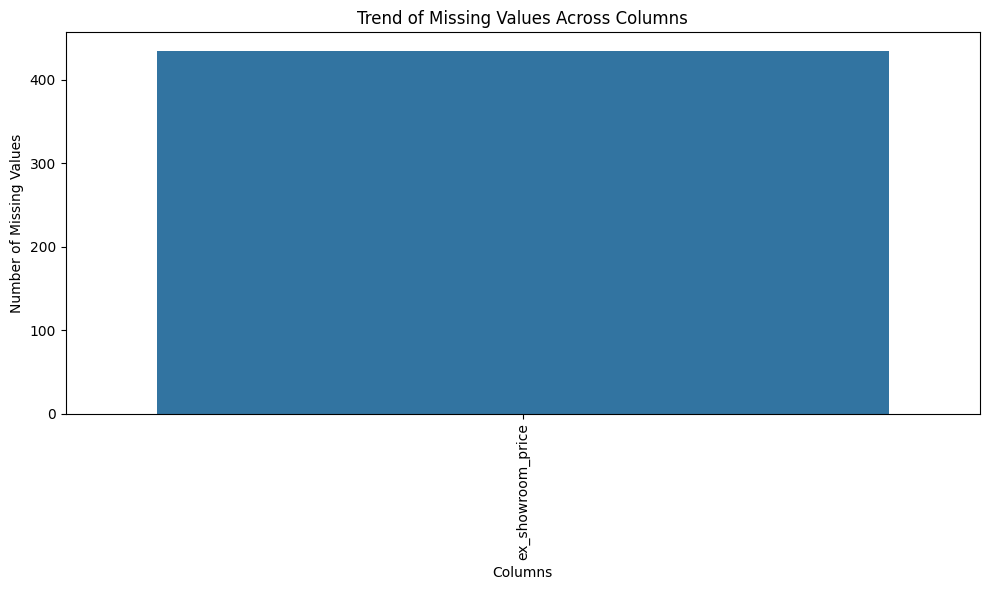

In [ ]:
# Ques 7. What is the trend of missing values across the dataset?

# Solution 7.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BIKE DETAILS.csv')
def find_missing_value_trend(df):
  missing_values = df.isnull().sum()
  missing_values = missing_values[missing_values > 0]

  if missing_values.empty:
    print("No missing values found in the df.")
  else:
    missing_values = missing_values.sort_values(ascending=False)

    # Visualize the trend using a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.xticks(rotation=90)
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.title("Trend of Missing Values Across Columns")
    plt.tight_layout()
    plt.show()

find_missing_value_trend(df)


In [ ]:
# Ques 8. What is the highest ex_showroom_price recorded, and for which bike?

# Solution 8.

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

highest_price = df["selling_price"].max()
bike_with_highest_price = df.loc[df["selling_price"] == highest_price, "name"].iloc[0]

print(f"The highest ex-showroom price is: {highest_price}")
print(f"The bike with the highest price is: {bike_with_highest_price}")


The highest ex-showroom price is: 760000
The bike with the highest price is: Suzuki GSX S750


In [ ]:
# Ques 9. What is the total number of bikes listed by each seller type?

# Solution 9.

import pandas as pd

bike_data = pd.read_csv('BIKE DETAILS.csv')

def calculate_bikes_by_seller_type(data):
  """
  Calculates the total number of bikes listed by each seller type.
  Args:
  data: A list of dictionaries, where each dictionary represents a bike listing
  and contains keys like 'seller_type' and other bike details.
  Returns:
  A pandas Series containing the counts of bikes for each seller type.
  """
df = pd.DataFrame(bike_data)
seller_counts = df['seller_type'].value_counts()
print(seller_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


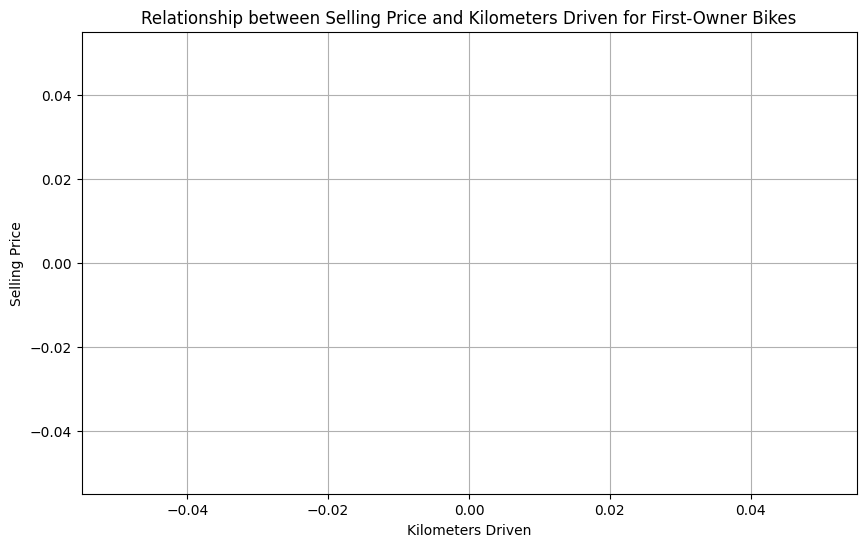

Correlation: nan


In [ ]:
# Ques 10. What is the relationship between selling_price and km_driven for first-owner bikes?

# Solution 10.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')

df_first_owner = df[df['owner'] == 'First Owner']

plt.figure(figsize=(10, 6))
plt.scatter(df_first_owner['km_driven'], df_first_owner['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Relationship between Selling Price and Kilometers Driven for First-Owner Bikes')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df_first_owner['selling_price'].corr(df_first_owner['km_driven'])
print(f"Correlation: {correlation}")


In [ ]:
# Ques 11. Identify and remove outliers in the km_driven column using the IQR method?

# Solution 11.

import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

Q1 = df['km_driven'].quantile(0.25)

Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("DataFrame without outliers shape:", df_no_outliers.shape)
print("Number of outliers removed:", outliers.shape[0])

# Display the outliers
print("Outliers:")
print(outliers)


Original DataFrame shape: (1061, 7)
DataFrame without outliers shape: (1022, 7)
Number of outliers removed: 39
Outliers:
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Indiv

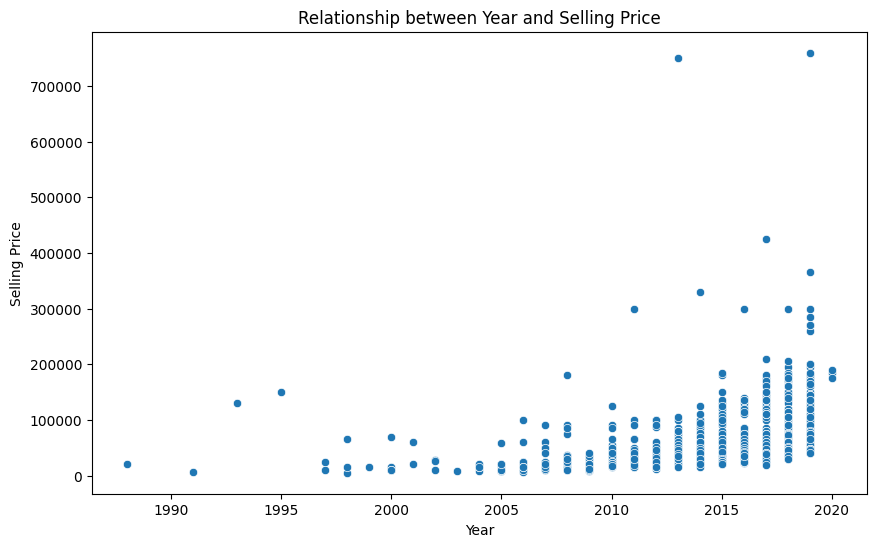

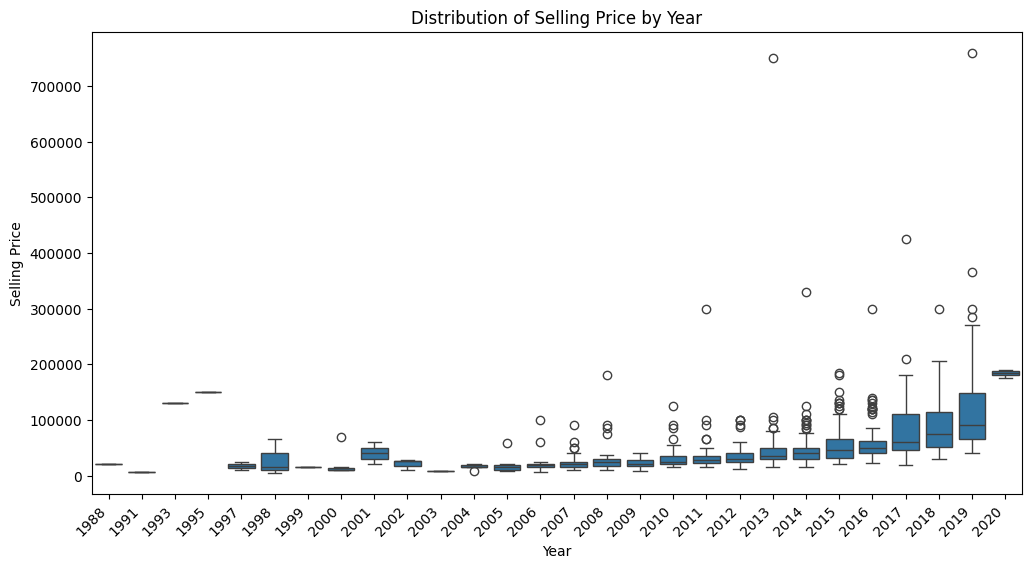

In [ ]:
# Ques 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

# Solution 12.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Alternatively, create a box plot to see the distribution of selling prices for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Distribution of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Ques 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year)

# Solution 13.

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('BIKE DETAILS.csv')

df['Age'] = current_year - df['year']

if 'selling_price' not in df.columns:
    print("Error: 'selling_price' column not found in the DataFrame.")
else:
    X = df[['Age']].values
    y = df['selling_price'].values

    model = LinearRegression()
    model.fit(X, y)

    depreciation_rate = -model.coef_[0]

    def predict_selling_price(age):
        age = max(0, int(age))
        return model.predict([[age]])[0]

    print("Depreciation rate:", depreciation_rate)
    print("Predicted selling price for a 6-year-old bike:", predict_selling_price(6))

Depreciation rate: 5264.804840778515
Predicted selling price for a 6-year-old bike: 86661.83427227126


In [ ]:
# Ques 14. Which bike names are priced significantly above the average price for their manufacturing year?

# Solution 14.

import pandas as pd
import numpy as np

df = pd.read_csv('BIKE DETAILS.csv')

average_prices = df.groupby('year')['selling_price'].mean().reset_index()

merged_data = df.merge(average_prices, on='year', suffixes=('_bike', '_average'))

print(merged_data.columns)

average_prices = df.groupby('year')['selling_price'].mean().reset_index().rename(columns={'selling_price': 'selling_price_average'})
merged_data = df.merge(average_prices, on='year', how='left')
print(merged_data.columns)
threshold = merged_data['selling_price_average'].mean() + merged_data['selling_price_average'].std()

overpriced_bikes = merged_data[merged_data['selling_price'] > threshold]
print(overpriced_bikes[['name', 'selling_price', 'selling_price_average']])



Index(['name', 'selling_price_bike', 'year', 'seller_type', 'owner',
       'km_driven', 'ex_showroom_price', 'selling_price_average'],
      dtype='object')
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'selling_price_average'],
      dtype='object')
                                     name  selling_price  \
0               Royal Enfield Classic 350         175000   
2     Royal Enfield Classic Gunmetal Grey         150000   
7    Royal Enfield Bullet 350 [2007-2011]         180000   
13                          Yamaha YZF R3         365000   
14                                Jawa 42         185000   
..                                    ...            ...   
982              Royal Enfield Bullet 350         105000   
983             Royal Enfield Classic 350         100000   
984             Royal Enfield Classic 500          95000   
985             Royal Enfield Classic 500          90000   
986                     Bajaj

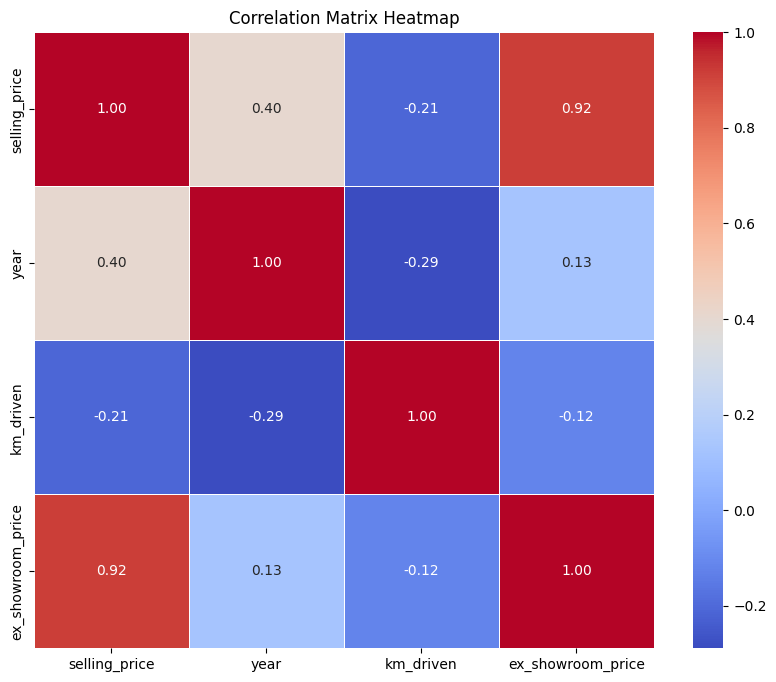

In [ ]:
# Ques 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?

# Solution 15.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')

numeric_cols = ['selling_price', 'year', 'km_driven','ex_showroom_price']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

           EDA 2  Questions
        

Average Selling Price by Dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.88

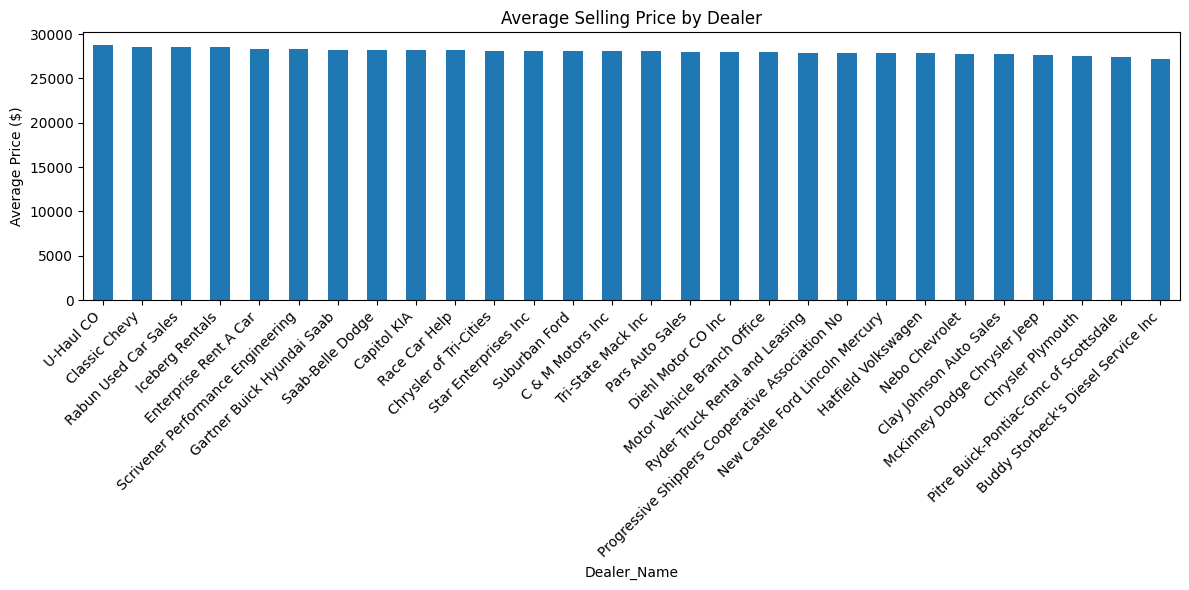

In [ ]:
# Ques 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

# Solution 1.

import pandas as pd

df = pd.read_csv('Car Sale.csv')

dealer_column = 'Dealer_Name'
price_column = 'Price ($)'

required_columns = [dealer_column, price_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df_cleaned = df.dropna(subset=[dealer_column, price_column]).copy()

    df_cleaned[price_column] = pd.to_numeric(df_cleaned[price_column], errors='coerce')
    df_cleaned.dropna(subset=[price_column], inplace=True)

    average_price_by_dealer = df_cleaned.groupby(dealer_column)[price_column].mean()

    print("Average Selling Price by Dealer:")
    print(average_price_by_dealer)

    # --- Comparing Average Prices ---

    print("\nComparison of Average Selling Prices Across Dealers:")
    print("To compare, you can look at the printed Series above.")
    print("You can also sort the results to easily see the dealers with the highest/lowest average prices:")
    print("\nAverage Prices Sorted (Descending):")
    print(average_price_by_dealer.sort_values(ascending=False))

    print("\nAverage Prices Sorted (Ascending):")
    print(average_price_by_dealer.sort_values(ascending=True))

    if len(average_price_by_dealer) < 30:
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 6))
        average_price_by_dealer.sort_values(ascending=False).plot(kind='bar')
        plt.title('Average Selling Price by Dealer')
        plt.xlabel(dealer_column)
        plt.ylabel('Average Price ($)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\nToo many dealers to display a clear bar plot. Consider visualizing for a subset of dealers or using other methods.")


In [ ]:
# Ques 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trends.

# Solution 2.

import pandas as pd
import numpy as np

df = pd.read_csv('Car Sale.csv')

brand_column = 'Company'
price_column = 'Price ($)'

required_columns = [brand_column, price_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df_cleaned = df.dropna(subset=[brand_column, price_column]).copy()

    df_cleaned[price_column] = pd.to_numeric(df_cleaned[price_column], errors='coerce')
    df_cleaned.dropna(subset=[price_column], inplace=True)

    price_std = df_cleaned.groupby(brand_column)[price_column].std()

    highest_variation_brand = price_std.idxmax()

    std_value = price_std[highest_variation_brand]

    # Print the results
    print(f"The car brand with the highest price variation is: {highest_variation_brand}")
    print(f"Standard deviation of prices for {highest_variation_brand}: ${std_value:.2f}")

    # --- Interpretation of Pricing Trends ---

    print("\nInterpretation:")
    print(f"The '{highest_variation_brand}' brand shows the highest price variation.")
    print("This could indicate several factors about its pricing trends, such as:")
    print("- A wide range of models, from entry-level to luxury.")
    print("- Significant differences in features, options, or trim levels within the brand.")
    print("- A mix of new and used cars with considerable depreciation differences.")
    print("- Variability in pricing strategies across different dealerships or markets.")
    print("\nFurther analysis (like looking at the minimum, maximum, and distribution of prices for this brand) would be needed to confirm these interpretations.")

The car brand with the highest price variation is: Lincoln
Standard deviation of prices for Lincoln: $19658.05

Interpretation:
The 'Lincoln' brand shows the highest price variation.
This could indicate several factors about its pricing trends, such as:
- A wide range of models, from entry-level to luxury.
- Significant differences in features, options, or trim levels within the brand.
- A mix of new and used cars with considerable depreciation differences.
- Variability in pricing strategies across different dealerships or markets.

Further analysis (like looking at the minimum, maximum, and distribution of prices for this brand) would be needed to confirm these interpretations.


Descriptive statistics for car prices by transmission type:
                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  

Interquartile Ranges (IQR) for car prices by transmission type:
                  75%      25%      IQR
Transmission                           
Auto          35500.0  19000.0  16500.0
Manual        34000.0  17000.0  17000.0


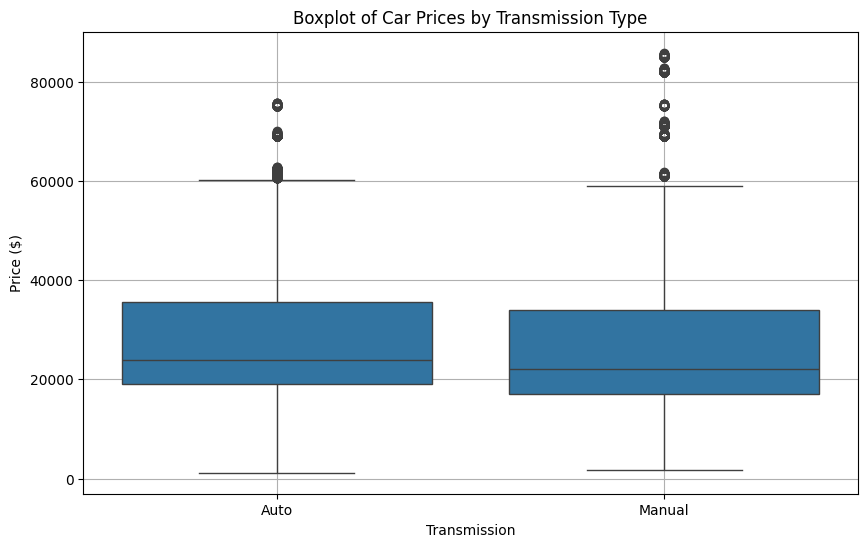

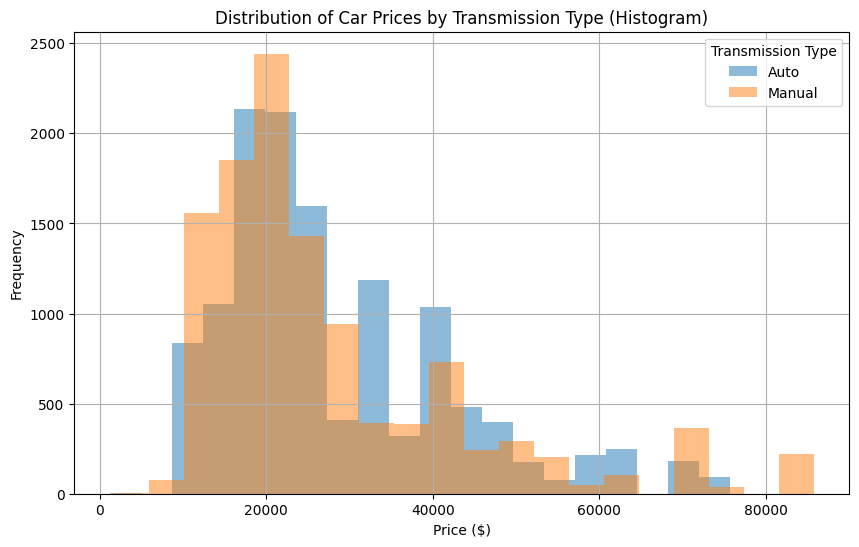

In [ ]:
# Ques 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
# compare

# Solution 3.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')

transmission_column = 'Transmission'
price_column = 'Price ($)'


required_columns = [transmission_column, price_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df_cleaned = df.dropna(subset=[transmission_column, price_column]).copy()

    df_cleaned[price_column] = pd.to_numeric(df_cleaned[price_column], errors='coerce')
    df_cleaned.dropna(subset=[price_column], inplace=True)

    print("Descriptive statistics for car prices by transmission type:")
    descriptive_stats = df_cleaned.groupby(transmission_column)[price_column].describe()
    print(descriptive_stats)

    iqr_values = descriptive_stats.loc[:, ['75%', '25%']].copy()
    iqr_values['IQR'] = iqr_values['75%'] - iqr_values['25%']
    print("\nInterquartile Ranges (IQR) for car prices by transmission type:")
    print(iqr_values)

    # Visualize the distribution of car prices by transmission using boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=transmission_column, y=price_column, data=df_cleaned)
    plt.title('Boxplot of Car Prices by Transmission Type')
    plt.xlabel(transmission_column)
    plt.ylabel(price_column)
    plt.grid(True)
    plt.show()

    transmission_types = df_cleaned[transmission_column].unique()
    if len(transmission_types) > 0:
        plt.figure(figsize=(10, 6))
        for transmission_type in transmission_types:
            subset_df = df_cleaned[df_cleaned[transmission_column] == transmission_type]
            plt.hist(subset_df[price_column], alpha=0.5, label=transmission_type, bins=20) # Adjust bins as needed
        plt.title('Distribution of Car Prices by Transmission Type (Histogram)')
        plt.xlabel(price_column)
        plt.ylabel('Frequency')
        plt.legend(title='Transmission Type')
        plt.grid(True)
        plt.show()
    else:
        print("\nNo transmission types found in the cleaned data for histogram visualization.")

Descriptive statistics of car prices by Dealer_Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300

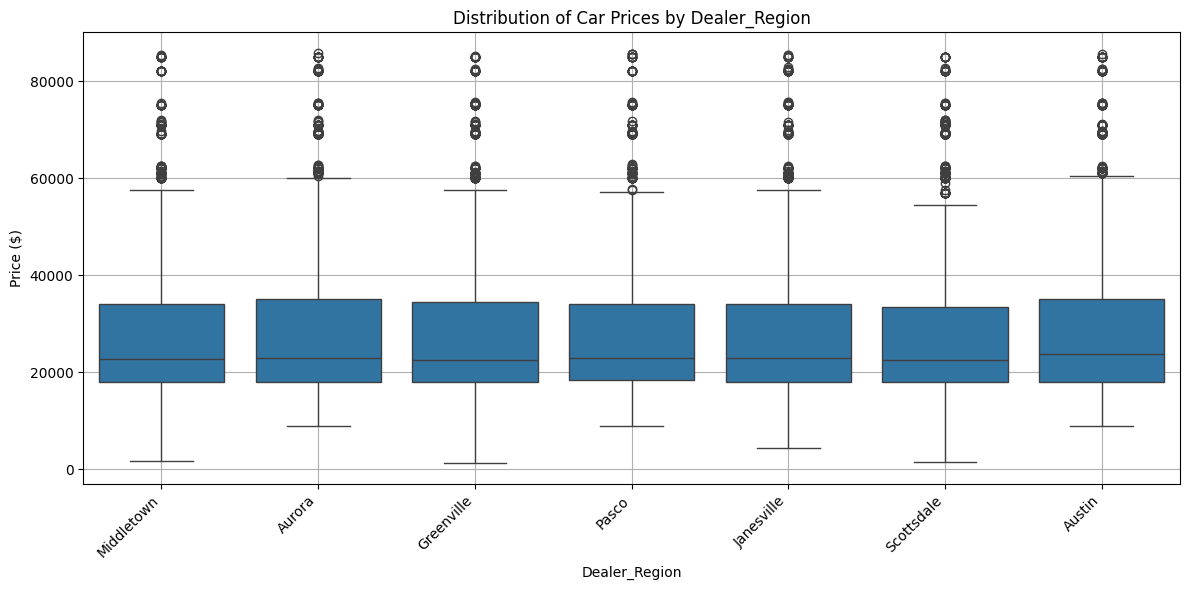

In [ ]:
# Ques 4. What is the distribution of car prices across different regions?

# Solution 4.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

region_column = 'Dealer_Region'
price_column = 'Price ($)'

required_columns = [region_column, price_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df_cleaned = df.dropna(subset=[region_column, price_column]).copy()

    print(f"Descriptive statistics of car prices by {region_column}:")
    price_distribution_by_region = df_cleaned.groupby(region_column)[price_column].describe()
    print(price_distribution_by_region)

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=region_column, y=price_column, data=df_cleaned)
    plt.title(f'Distribution of Car Prices by {region_column}')
    plt.xlabel(region_column)
    plt.ylabel(price_column)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Ques 5. What is the distribution of cars based on body styles?

# Solution 5.

import pandas as pd

df = pd.read_csv('Car Sale.csv')

body_style_counts = df['Body Style'].value_counts()

body_style_percentage = (body_style_counts / len(df)) * 100

# Print the distribution
print(body_style_percentage)


Body Style
SUV          26.662762
Hatchback    25.633732
Sedan        18.773530
Passenger    16.502133
Hardtop      12.427842
Name: count, dtype: float64


Average Selling Price by Customer Gender and Annual Income:
Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


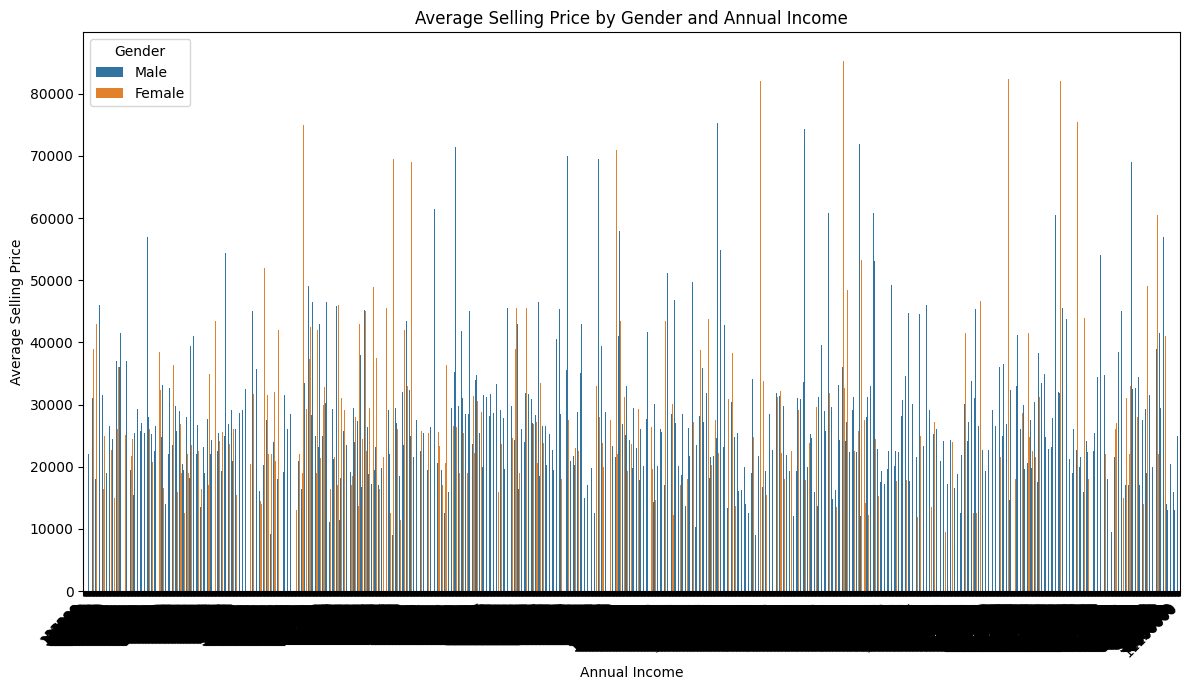

In [ ]:
# Ques 6. How does the average selling price of cars vary by customer gender and annual income?

# Solution 6.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Car Sale.csv')
except FileNotFoundError:
    print("Error: 'Car Sale.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Check if required columns exist
required_columns = ['Gender', 'Annual Income', 'Price ($)']
if not all(col in df.columns for col in required_columns):
    print(f"Error: Missing one or more required columns: {required_columns}. Please check your CSV file.")
    exit()

average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()

# Print the result
print("Average Selling Price by Customer Gender and Annual Income:")
print(average_price_by_gender_income)

plot_data = average_price_by_gender_income.reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Annual Income', y='Price ($)', hue='Gender', data=plot_data)
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Gender and Annual Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Descriptive statistics of car prices by Dealer_Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300

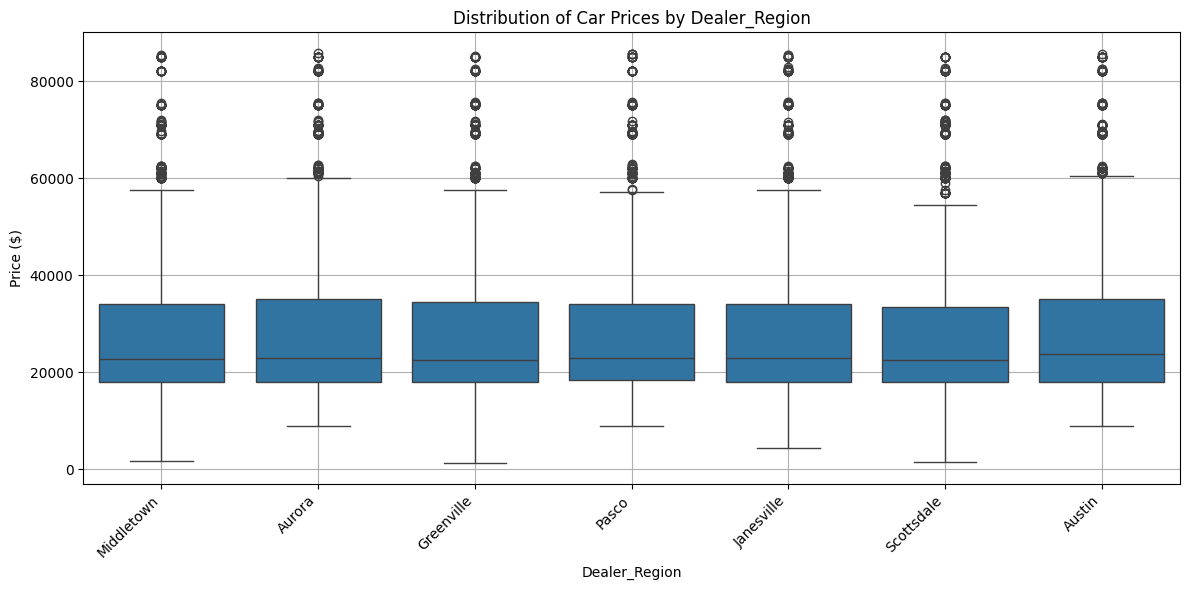


Number of cars sold/listed by Dealer_Region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


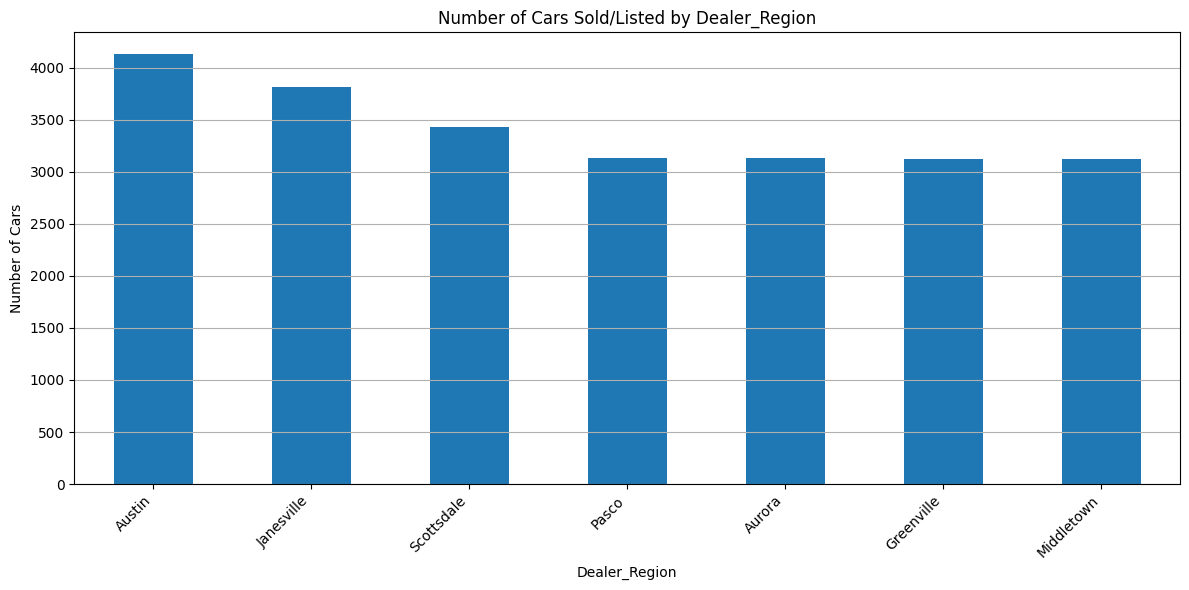

In [ ]:
# Ques 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

# Solution 7.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

region_column = 'Dealer_Region'
price_column = 'Price ($)'

required_columns = [region_column, price_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df_cleaned = df.dropna(subset=[region_column, price_column]).copy()

    print(f"Descriptive statistics of car prices by {region_column}:")
    price_distribution_by_region = df_cleaned.groupby(region_column)[price_column].describe()
    print(price_distribution_by_region)

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=region_column, y=price_column, data=df_cleaned)
    plt.title(f'Distribution of Car Prices by {region_column}')
    plt.xlabel(region_column)
    plt.ylabel(price_column)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    cars_by_region = df_cleaned[region_column].value_counts()

    # Print the number of cars by region
    print(f"\nNumber of cars sold/listed by {region_column}:")
    print(cars_by_region)

    # Visualize the number of cars sold by region using a bar plot
    plt.figure(figsize=(12, 6))
    cars_by_region.plot(kind='bar')
    plt.title(f'Number of Cars Sold/Listed by {region_column}')
    plt.xlabel(region_column)
    plt.ylabel('Number of Cars')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [ ]:
# Ques 8. How does the average car price differ between cars with different engine sizes.

# Solution 8.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')

engine_size_column = 'engine_size'
price_column = 'Price ($)'

# Check if the required columns exist
if engine_size_column not in df.columns:
    print(f"Error: Column '{engine_size_column}' not found in the DataFrame.")
elif price_column not in df.columns:
     print(f"Error: Column '{price_column}' not found in the DataFrame.")
else:
    df.dropna(subset=[engine_size_column, price_column], inplace=True)

    average_prices = df.groupby(engine_size_column)[price_column].mean()

    # Print the average prices
    print("Average Car Price by Engine Size:")
    print(average_prices)

    # Visualize the results (bar chart)
    plt.figure(figsize=(10, 6))
    average_prices.plot(kind='bar')
    plt.xlabel('Engine Size')
    plt.ylabel('Average Price ($)')
    plt.title('Average Car Price by Engine Size')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Error: Column 'engine_size' not found in the DataFrame.


<ipython-input-3-dd05ecdffbe0>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_variation_by_income = df.groupby('Income Bracket')[price_column].describe()


Price Variation by Annual Income Bracket:
                  count          mean           std      min      25%  \
Income Bracket                                                          
0-30k            5275.0  27884.297820  14909.070561   1200.0  18000.0   
30k-60k             0.0           NaN           NaN      NaN      NaN   
60k-100k            1.0  43000.000000           NaN  43000.0  43000.0   
100k-150k           5.0  23200.200000  12950.343633  14000.0  17000.0   
150k+           18624.0  28149.204897  14755.224992   1450.0  18001.0   

                    50%      75%      max  
Income Bracket                             
0-30k           22001.0  34000.0  85001.0  
30k-60k             NaN      NaN      NaN  
60k-100k        43000.0  43000.0  43000.0  
100k-150k       19000.0  20000.0  46001.0  
150k+           23000.0  34001.0  85800.0  


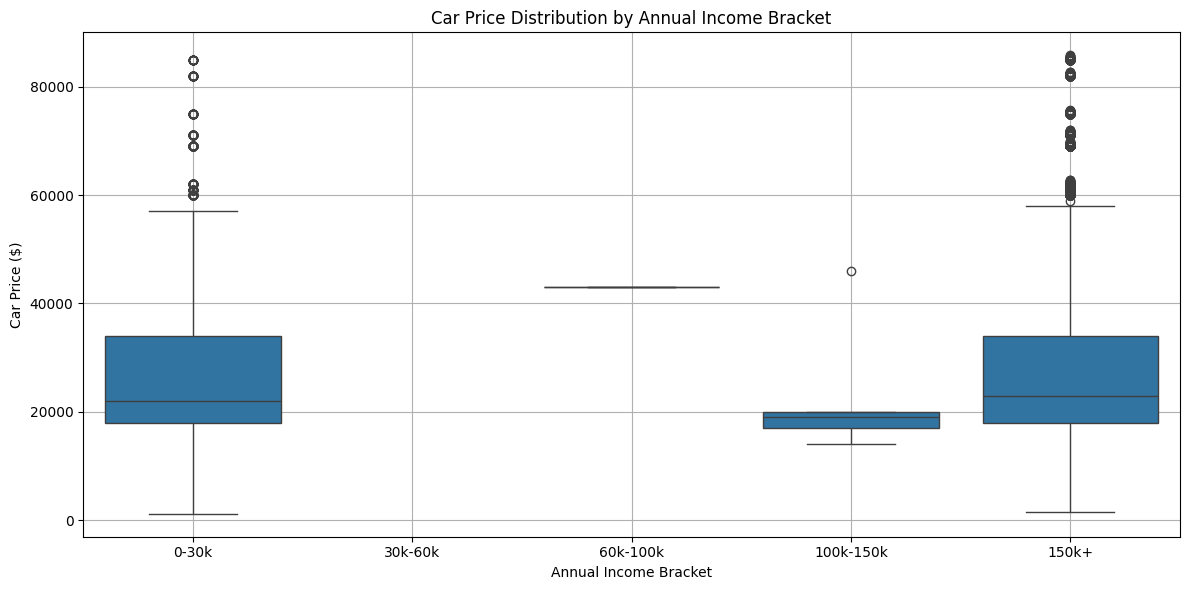

In [ ]:
# Ques 9. How do car prices vary based on the customer’s annual income bracket?

# Solution 9.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

income_column = 'Annual Income'
price_column = 'Price ($)'

# Check if the required columns exist
if income_column not in df.columns:
    print(f"Error: Column '{income_column}' not found in the DataFrame.")
elif price_column not in df.columns:
     print(f"Error: Column '{price_column}' not found in the DataFrame.")
else:
    df.dropna(subset=[income_column, price_column], inplace=True)

    income_bins = [0, 30000, 60000, 100000, 150000, df[income_column].max()]
    income_labels = ['0-30k', '30k-60k', '60k-100k', '100k-150k', '150k+']

    df['Income Bracket'] = pd.cut(df[income_column], bins=income_bins, labels=income_labels, right=False)

    # Analyze price variation within each income bracket (descriptive statistics)
    price_variation_by_income = df.groupby('Income Bracket')[price_column].describe()
    print("Price Variation by Annual Income Bracket:")
    print(price_variation_by_income)

    # Visualize the distribution of car prices for each income bracket (boxplot)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Income Bracket', y=price_column, data=df, order=income_labels) # Use order to maintain bracket order
    plt.title('Car Price Distribution by Annual Income Bracket')
    plt.xlabel('Annual Income Bracket')
    plt.ylabel('Car Price ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Top 5 Car Models by Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64

Price Distribution for Top 5 Car Models:
            count          mean           std      min      25%      50%  \
Model                                                                      
Diamante    418.0  22268.303828   9770.768958  12000.0  18000.0  19001.0   
Passat      391.0  19600.728900   8218.521683   9000.0  12001.0  20000.0   
Prizm       411.0  22838.457421   8012.531045  15000.0  16000.0  22000.0   
Ram Pickup  383.0  27820.864230  13297.609534  16000.0  19000.0  21000.0   
Silhouette  411.0  29858.513382  17940.571762  12000.0  14001.0  25000.0   

                75%      max  
Model                         
Diamante    22000.0  49801.0  
Passat      27001.0  32501.0  
Prizm       25000.0  44700.0  
Ram Pickup  39300.0  57750.0  
Silhouette  34500.0  60750.0  


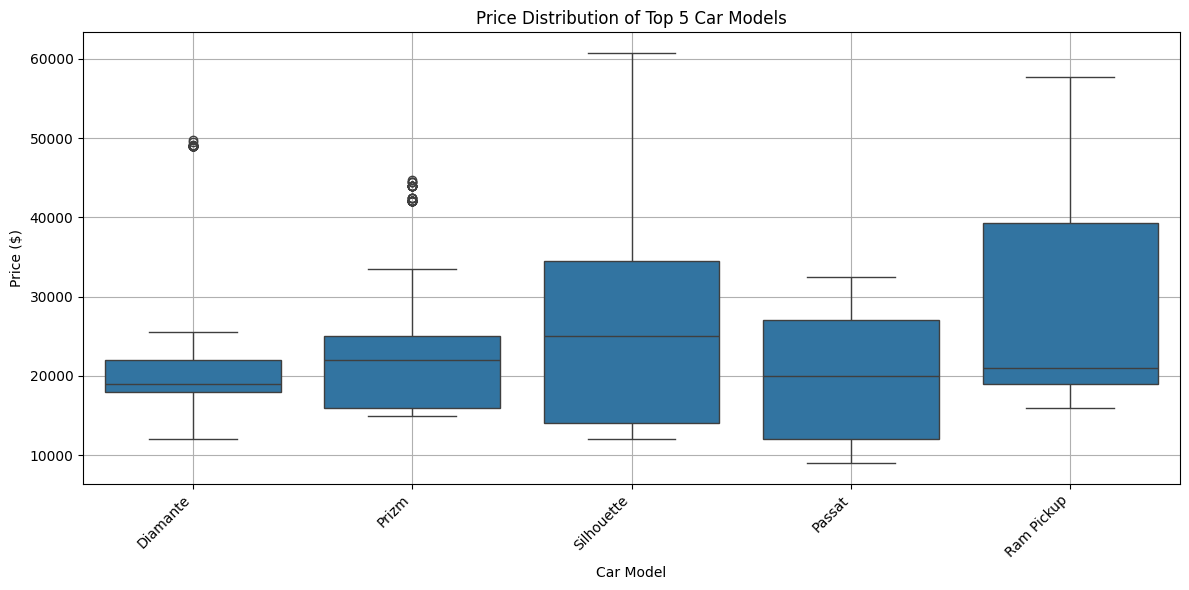

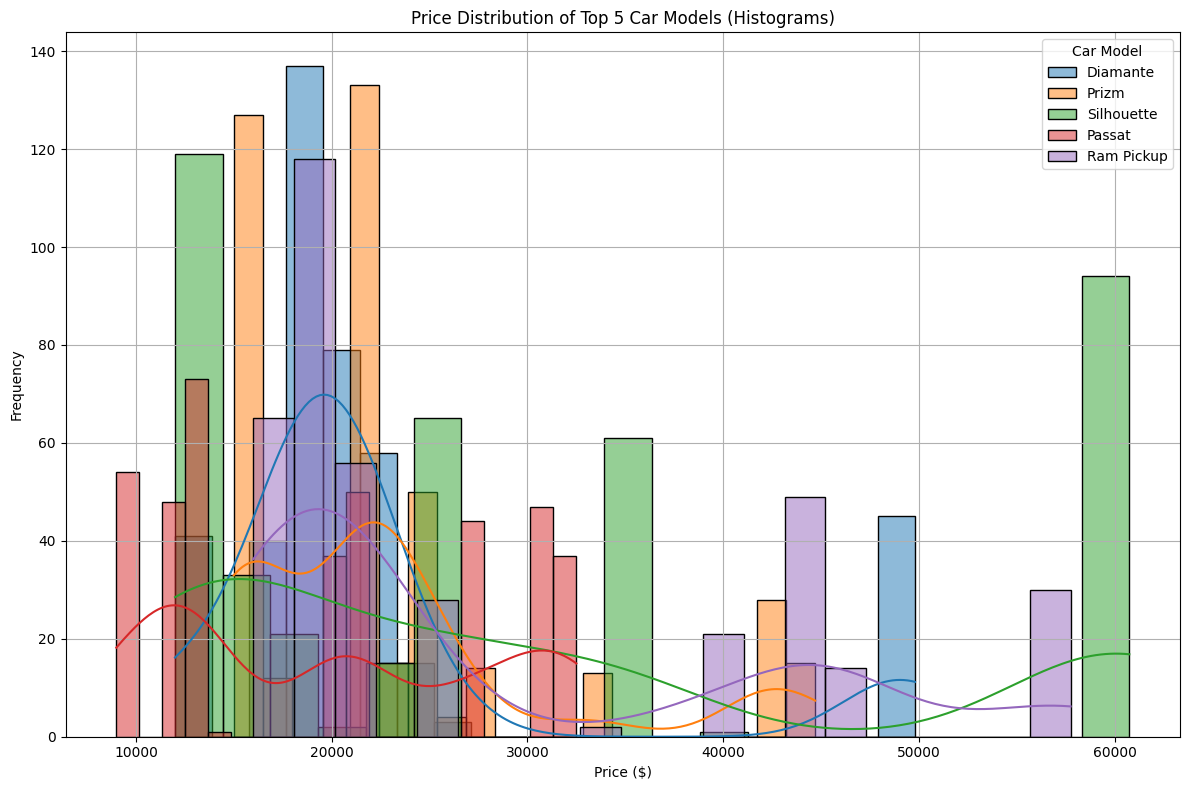

In [ ]:
# Ques 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

# Solution 10.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

model_column = 'Model'
price_column = 'Price ($)'

if model_column not in df.columns:
    print(f"Error: Column '{model_column}' not found in the DataFrame.")
elif price_column not in df.columns:
     print(f"Error: Column '{price_column}' not found in the DataFrame.")
else:
    df.dropna(subset=[model_column, price_column], inplace=True)
    model_sales = df[model_column].value_counts()
    top_5_models = model_sales.head(5).index.tolist()

    print("Top 5 Car Models by Sales:")
    print(model_sales.head(5))

    df_top_models = df[df[model_column].isin(top_5_models)].copy()

    print("\nPrice Distribution for Top 5 Car Models:")
    print(df_top_models.groupby(model_column)[price_column].describe())

    # Visualize the price distribution using boxplots
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=model_column, y=price_column, data=df_top_models, order=top_5_models)
    plt.title('Price Distribution of Top 5 Car Models')
    plt.xlabel('Car Model')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Alternatively, visualize the price distribution using histograms
    plt.figure(figsize=(12, 8))
    for model in top_5_models:
        sns.histplot(data=df_top_models[df_top_models[model_column] == model], x=price_column, kde=True, label=model, bins=20)
    plt.title('Price Distribution of Top 5 Car Models (Histograms)')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    plt.legend(title='Car Model')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
# Ques 11. How does car price vary with engine size across different car colors, and which colors have the highest price
# variation

# Solution 11.

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

price_column = 'Price ($)'
engine_size_column = 'Engine size'
color_column = 'Color'

required_columns = [price_column, engine_size_column, color_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df.dropna(subset=required_columns, inplace=True)
    price_variation_by_color = df.groupby(color_column)[price_column].std().sort_values(ascending=False)
    print("Price variation by color (Standard Deviation):")
    print(price_variation_by_color)
    top_variation_colors = price_variation_by_color.head(5).index.tolist()
    print(f"\nTop 5 colors with highest price variation: {top_variation_colors}")

    # Visualize the relationship between price, engine size, and color (example using scatter plot)
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x=engine_size_column, y=price_column, hue=color_column, data=df, alpha=0.7)
    plt.title('Car Price vs. Engine Size colored by Car Color')
    plt.xlabel(engine_size_column)
    plt.ylabel(price_column)
    plt.legend(title=color_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nLinear Regression Analysis per Color (Engine Size vs. Price):")
    for color in df[color_column].unique():
        df_color = df[df[color_column] == color].copy()
        if len(df_color) > 1:
            X = df_color[[engine_size_column]]
            y = df_color[price_column]
            model = LinearRegression()
            model.fit(X, y)
            print(f"Color: {color}, Intercept: {model.intercept_:.2f}, Coefficient (Engine Size): {model.coef_[0]:.2f}")
        else:
            print(f"Color: {color}, Not enough data points for regression.")


Error: Missing one or more required columns: ['Engine size']. Please check your CSV file.


<ipython-input-6-80644234630e>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df[sales_column].resample('M').count() # Or .sum() if analyzing total price


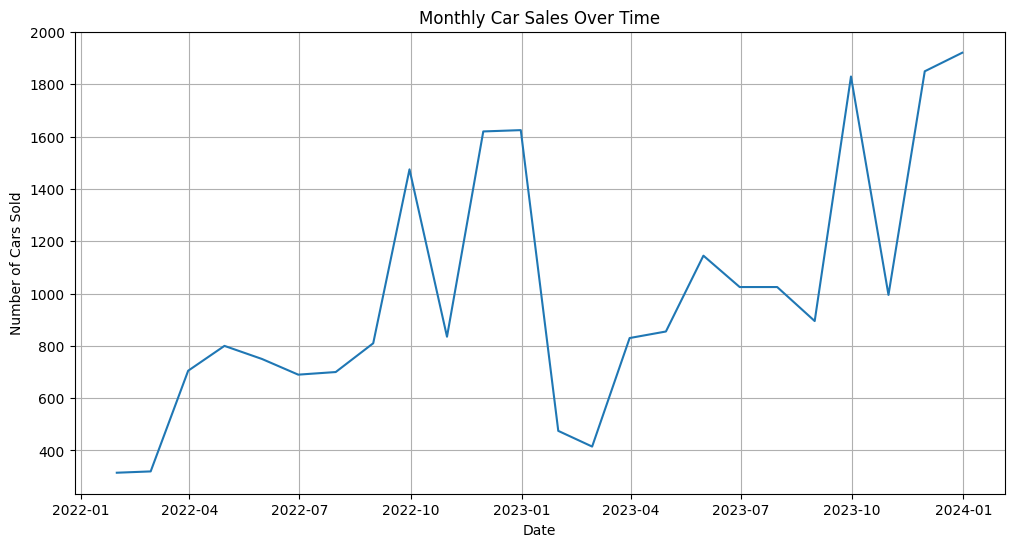

<Figure size 1000x800 with 0 Axes>

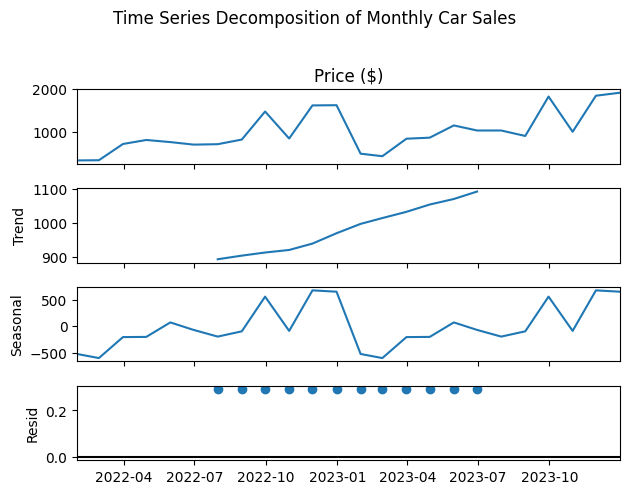

In [ ]:
# Ques 12. Is there any seasonal trend in car sales based on the date of sale?

# Solution 12.

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('Car Sale.csv')
except FileNotFoundError:
    print("Error: 'Car Sale.csv' not found. Please ensure the file is in the correct directory.")
    exit()

date_column = 'Date'
sales_column = 'Price ($)'

required_columns = [date_column, sales_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
    exit()

df[date_column] = pd.to_datetime(df[date_column])

df.set_index(date_column, inplace=True)

monthly_sales = df[sales_column].resample('M').count()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title('Monthly Car Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cars Sold' if sales_column == 'Price ($)' else 'Total Sales Value')
plt.grid(True)
plt.show()

try:
    decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')

    plt.figure(figsize=(10, 8))
    fig = decomposition.plot()
    plt.suptitle('Time Series Decomposition of Monthly Car Sales', y=1.02)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not perform time series decomposition. Make sure you have enough data points for the chosen frequency (e.g., at least two full cycles for monthly data). Error: {e}")



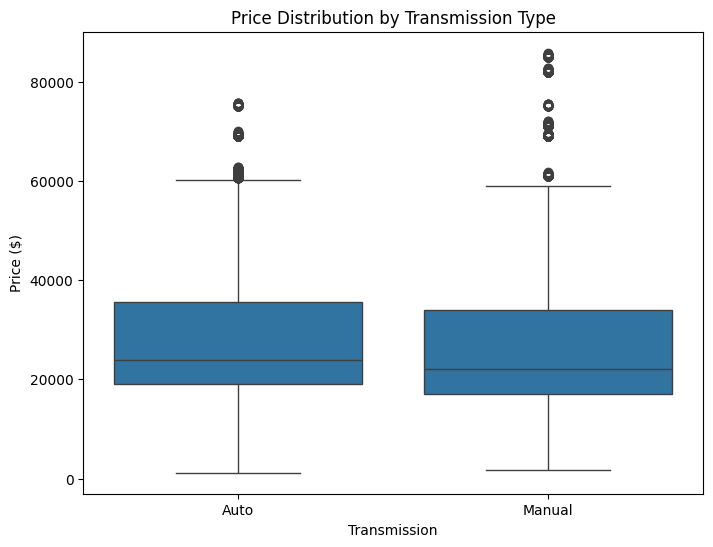

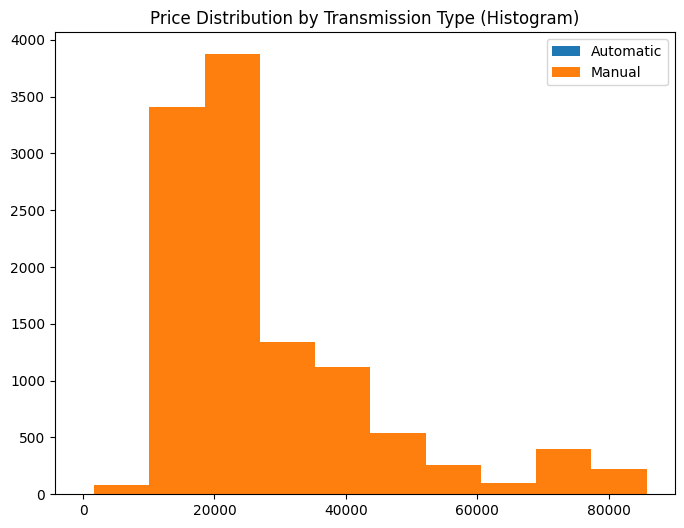

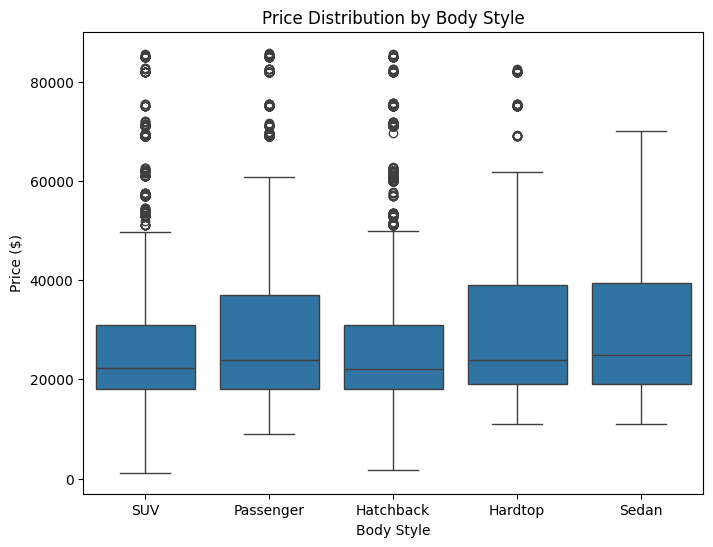

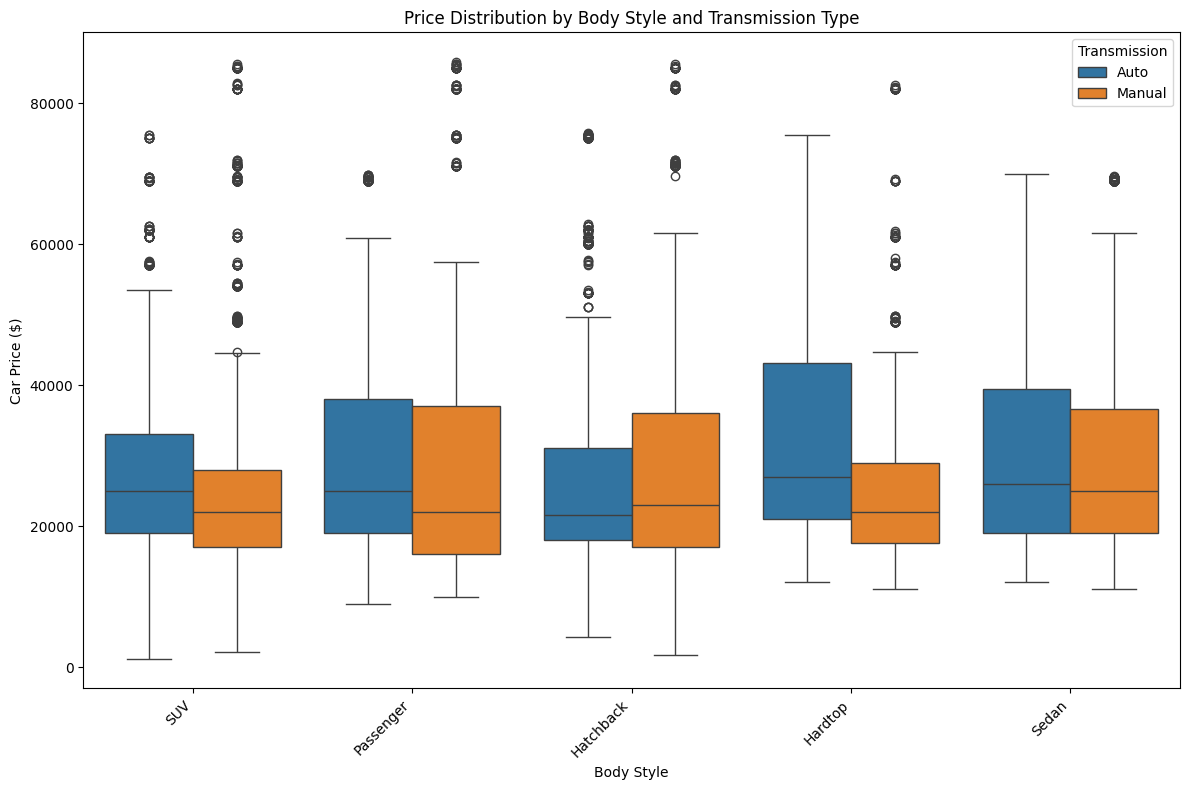

Price distribution by Body Style and Transmission Type:
                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.

In [ ]:
# Ques 13. How does the car price distribution change when considering different combinations of body style and
# transmission type?

# Solution 13.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

plt.figure(figsize=(8, 6))

sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

plt.figure(figsize=(8, 6))

plt.hist(df[df['Transmission'] == 'Automatic']['Price ($)'], bins=10, label='Automatic')
plt.hist(df[df['Transmission'] == 'Manual']['Price ($)'], bins=10, label='Manual')
plt.title('Price Distribution by Transmission Type (Histogram)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))

sns.boxplot(x='Body Style', y='Price ($)', data=df)
plt.title('Price Distribution by Body Style')
plt.show()

plt.figure(figsize=(12, 8))

sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission')
plt.tight_layout()
plt.show()

price_distribution_by_combination = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

# Print the results
print("Price distribution by Body Style and Transmission Type:")
print(price_distribution_by_combination)

In [ ]:
# Ques 14. What is the correlation between car price, engine size, and annual income of customers, and how do these
# features interact?

# Solution 14.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')

price_column = 'Price ($)'
engine_size_column = 'Engine Size'
income_column = 'Annual Income'

required_columns = [price_column, engine_size_column, income_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df_cleaned = df.dropna(subset=required_columns).copy()

    correlation_matrix = df_cleaned[[price_column, engine_size_column, income_column]].corr()

    print("Correlation Matrix:")
    print(correlation_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
    plt.show()

    sns.pairplot(df_cleaned, vars=[price_column, engine_size_column, income_column], kind='reg') # 'reg' adds regression lines
    plt.suptitle('Pairwise Relationships between Car Price, Engine Size, and Annual Income', y=1.02)
    plt.show()


Error: Missing one or more required columns: ['Engine Size']. Please check your CSV file.


In [ ]:
# Ques 15. How does the average car price vary across different car models and engine types?

# Solution 15.

import pandas as pd

df = pd.read_csv('Car Sale.csv')

model_column = 'Model'
engine_size_column = 'Engine Size'
price_column = 'Price ($)'


required_columns = [model_column, engine_size_column, price_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df_cleaned = df.dropna(subset=required_columns).copy()

    grouped_data = df_cleaned.groupby([model_column, engine_size_column])[price_column].mean()

    print("Average Car Price by Model and Engine Size:")
    print(grouped_data)


Error: Missing one or more required columns: ['Engine Size']. Please check your CSV file.


    EDA 3 Questions

In [ ]:
# Ques 1. What is the average rating for each product category?

# Solution 1.

import pandas as pd

df = pd.read_csv('amazon.csv')

category_col = 'category'
rating_col = 'rating'

required_columns = [category_col, rating_col]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

    df_cleaned = df.dropna(subset=[category_col, rating_col]).copy()

    average_ratings = df_cleaned.groupby(category_col)[rating_col].mean()
    print("Average Rating by Category:")
    print(average_ratings)

Average Rating by Category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stati

In [ ]:
# Ques 2. What are the top rating_count products by category?

# Solution 2.

import pandas as pd

df = pd.read_csv('amazon.csv')

category_col = 'category'
rating_count_col = 'rating_count'

required_columns = [category_col, rating_count_col]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df[rating_count_col] = pd.to_numeric(df[rating_count_col], errors='coerce')

    df_cleaned = df.dropna(subset=[category_col, rating_count_col]).copy()

    def get_top_products_by_category(df, category_col, rating_count_col, top_n=5):
        """
        Calculates the top products by rating count within each category.

        Args:
            df (pd.DataFrame): The input DataFrame with product data.
            category_col (str): The name of the column containing product categories.
            rating_count_col (str): The name of the column containing rating counts.
            top_n (int, optional): The number of top products to retrieve per category. Defaults to 5.

        Returns:
            pd.DataFrame: A DataFrame containing the top products by rating count for each category.
        """
        top_products = df.groupby(category_col).apply(
            lambda x: x.nlargest(top_n, rating_count_col)
        ).reset_index(drop=True)

        return top_products

    top_products_per_category = get_top_products_by_category(df_cleaned, category_col, rating_count_col, top_n=5)

    print("Top Products by Rating Count per Category:")
    print(top_products_per_category)


Top Products by Rating Count per Category:
     product_id                                       product_name  \
0    B09F3PDDRF  Lapster USB 3.0 sata Cable for 2.5 inch SSD an...   
1    B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
2    B08QSDKFGQ  Zoul USB Type C Fast Charging 3A Nylon Braided...   
3    B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
4    B09CMQRQM6  Ambrane Fast 100W Output Cable with Type-C to ...   
..          ...                                                ...   
183  B09BL2KHQW         KENT POWP-Sediment Filter 10'' Thread WCAP   
184  B0BBLHTRM9  IONIX Tap filter Multilayer | Activated Carbon...   
185  B0BHYLCL19  AVNISH Tap Water Purifier Filter Faucet 6 Laye...   
186  B095X38CJS  BRUSTRO Copytinta Coloured Craft Paper A4 Size...   
187  B099S26HWG  Classmate Pulse 1 Subject Notebook - 240mm x 1...   

                                              category discounted_price  \
0    Computers&Accessories|Accessories&Pe

<ipython-input-32-06bb482d940a>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = df.groupby(category_col).apply(


Descriptive Statistics for Original and Discounted Prices:
       actual_price  discounted_price
count           0.0               0.0
mean            NaN               NaN
std             NaN               NaN
min             NaN               NaN
25%             NaN               NaN
50%             NaN               NaN
75%             NaN               NaN
max             NaN               NaN


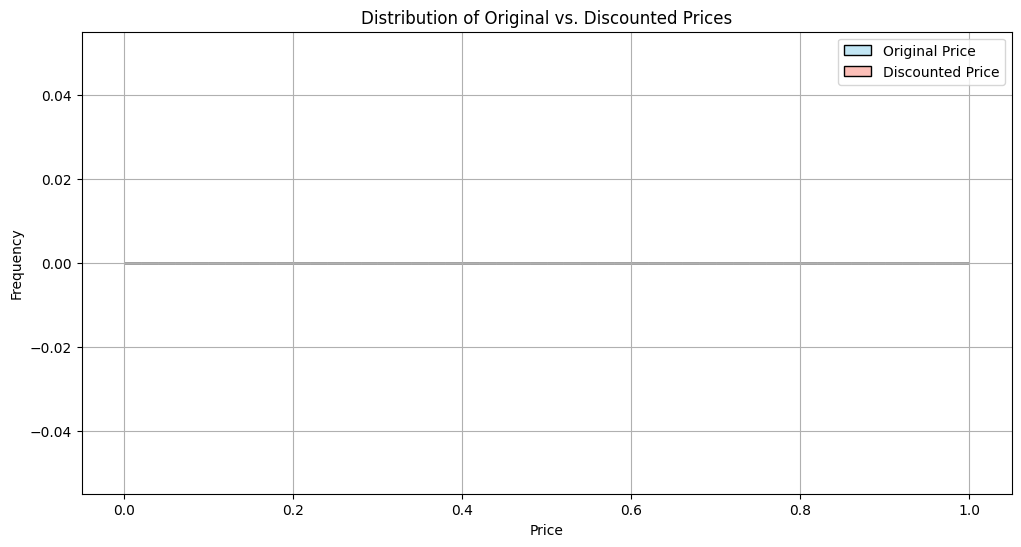

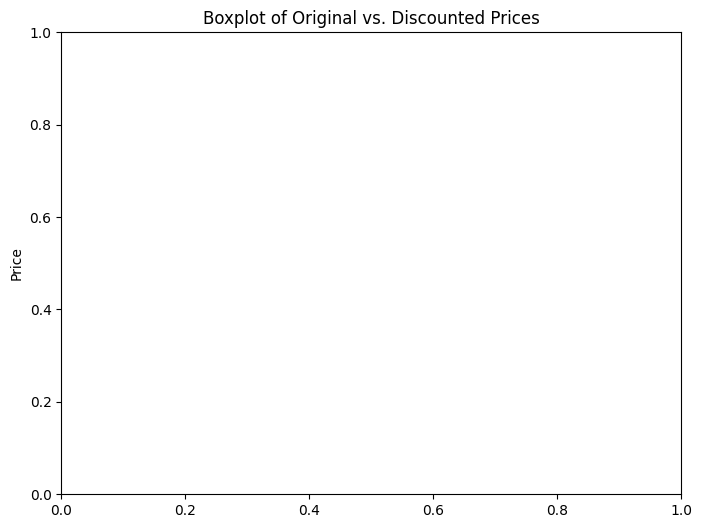

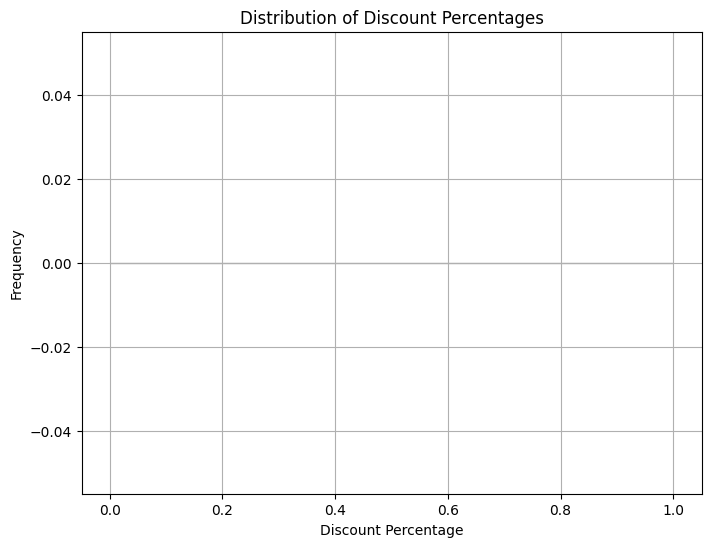


Sample of Original vs. Discounted Prices:
Empty DataFrame
Columns: [actual_price, discounted_price]
Index: []


In [ ]:
# Ques 3. What is the distribution of discounted prices vs. actual prices?

# Solution 3.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amazon.csv')

original_price_col = 'actual_price'
discounted_price_col = 'discounted_price'

required_columns = [original_price_col, discounted_price_col]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df[original_price_col] = pd.to_numeric(df[original_price_col], errors='coerce')
    df[discounted_price_col] = pd.to_numeric(df[discounted_price_col], errors='coerce')

    df_cleaned = df.dropna(subset=[original_price_col, discounted_price_col]).copy()

    df_cleaned = df_cleaned[df_cleaned[original_price_col] > 0].copy()

    df_cleaned['Discount Amount'] = df_cleaned[original_price_col] - df_cleaned[discounted_price_col]
    df_cleaned['Discount Percentage'] = ((df_cleaned[original_price_col] - df_cleaned[discounted_price_col]) / df_cleaned[original_price_col]) * 100

    print("Descriptive Statistics for Original and Discounted Prices:")
    print(df_cleaned[[original_price_col, discounted_price_col]].describe())

    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_cleaned, x=original_price_col, kde=True, color='skyblue', label='Original Price', bins=50) # Adjust bins as needed
    sns.histplot(data=df_cleaned, x=discounted_price_col, kde=True, color='salmon', label='Discounted Price', bins=50) # Adjust bins as needed
    plt.title('Distribution of Original vs. Discounted Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cleaned[[original_price_col, discounted_price_col]])
    plt.title('Boxplot of Original vs. Discounted Prices')
    plt.ylabel('Price')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_cleaned, x='Discount Percentage', kde=True, color='lightgreen', bins=50)
    plt.title('Distribution of Discount Percentages')
    plt.xlabel('Discount Percentage')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    print("\nSample of Original vs. Discounted Prices:")
    print(df_cleaned[[original_price_col, discounted_price_col]].head())

In [ ]:
# Ques 4. How does the average discount percentage vary across categories?

# Solution 4.

import pandas as pd
import numpy as np

df = pd.read_csv('amazon.csv')

original_price_col = 'actual_price'
discounted_price_col = 'discounted_price'
category_col = 'category'

required_columns = [original_price_col, discounted_price_col, category_col]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df[original_price_col] = pd.to_numeric(df[original_price_col], errors='coerce')
    df[discounted_price_col] = pd.to_numeric(df[discounted_price_col], errors='coerce')

    df_cleaned = df.dropna(subset=[original_price_col, discounted_price_col, category_col]).copy()

    df_cleaned = df_cleaned[df_cleaned[original_price_col] > 0].copy()

    df_cleaned['Discount Percentage'] = ((df_cleaned[original_price_col] - df_cleaned[discounted_price_col]) / df_cleaned[original_price_col]) * 100
    average_discounts = df_cleaned.groupby(category_col)['Discount Percentage'].mean()

    # Display the result
    print("Average Discount Percentage by Category:")
    print(average_discounts)

Average Discount Percentage by Category:
Series([], Name: Discount Percentage, dtype: float64)


In [ ]:
# Ques 5. What are the most popular product names?

# Solution 5.

import pandas as pd
from collections import Counter

df = pd.read_csv('amazon.csv')

product_name_column = 'product_name'

if product_name_column not in df.columns:
    print(f"Error: Column '{product_name_column}' not found in the DataFrame.")
else:
    df_cleaned = df.dropna(subset=[product_name_column]).copy()
    product_names = df_cleaned[product_name_column].tolist()

    def get_most_popular_products(product_names_list, top_n=5):
        """
        Calculates the most popular product names from a list.

        Args:
            product_names_list (list): A list of product names (strings).
            top_n (int, optional): The number of most popular products to return. Defaults to 5.

        Returns:
            list: A list of tuples, where each tuple contains a product name and its count,
                  sorted by count in descending order.
        """

        product_counts = Counter(product_names_list)

        most_common_products = product_counts.most_common(top_n)

        return most_common_products

    top_popular_products = get_most_popular_products(product_names, top_n=10)

    # Print the results
    print(f"Top {len(top_popular_products)} Most Popular Product Names:")
    for product, count in top_popular_products:
        print(f"- {product}: {count}")


Top 10 Most Popular Product Names:
- Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution: 5
- Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating: 4
- Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey): 3
- Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black): 3
- Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices: 3
- boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 20 Most Popular Keywords (based on average TF-IDF):
black: 0.0428
cable: 0.0406
usb: 0.0386
charging: 0.0267
gb: 0.0265
fast: 0.0230
white: 0.0220
smart: 0.0218
tv: 0.0212
type: 0.0201
hd: 0.0200
led: 0.0187
cm: 0.0175
data: 0.0173
heater: 0.0170
compatible: 0.0166
inches: 0.0162
remote: 0.0156
water: 0.0153
watt: 0.0152

Top 20 Most Common Words (after cleaning):
black: 470
cable: 403
usb: 391
charging: 246
fast: 211
c: 199
w: 191
gb: 186
smart: 172
white: 155
type: 149
tv: 146
compatible: 142
hd: 137
data: 135
wireless: 118
led: 118
pro: 112
water: 110
remote: 108


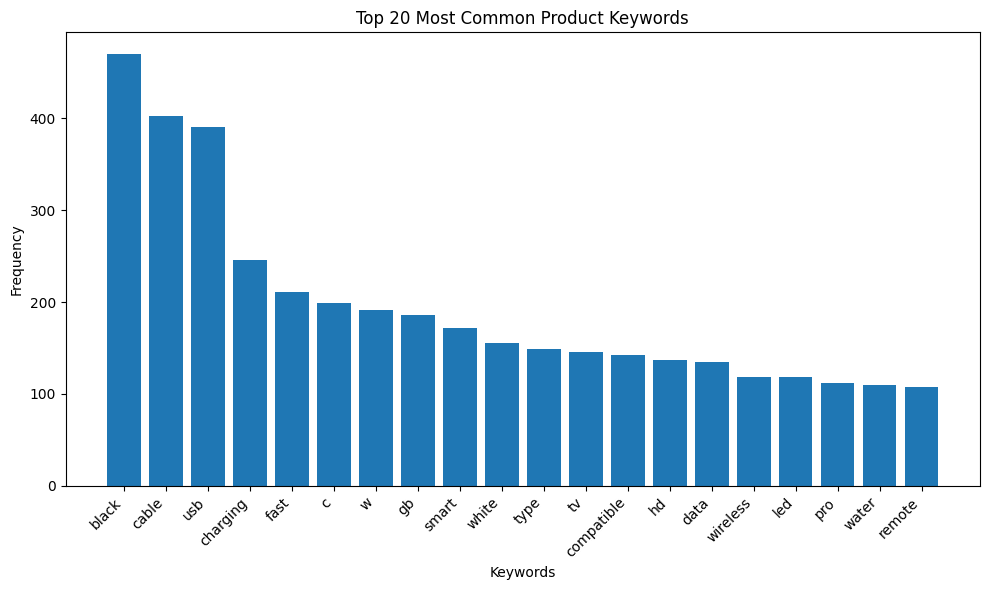

In [ ]:
# Ques 6. What are the most popular product keywords?

# Solution 6.

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

try:
    df = pd.read_csv('amazon.csv')
except FileNotFoundError:
    print("Error: 'amazon.csv' not found. Please ensure the file is in the correct directory.")
    exit()

text_columns = ['product_name']

df['combined_text'] = df[text_columns].fillna('').agg(' '.join, axis=1)

# --- Text Preprocessing ---

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_text'] = df['combined_text'].apply(clean_text)

stop_words = set(stopwords.words('english'))

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# --- Keyword Extraction (Using TF-IDF as an example) ---

tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.90, max_features=1000)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

average_tfidf_scores = tfidf_matrix.mean(axis=0).A1

keyword_tfidf_scores = dict(zip(feature_names, average_tfidf_scores))

most_popular_keywords_tfidf = sorted(keyword_tfidf_scores.items(), key=lambda item: item[1], reverse=True)

print("Top 20 Most Popular Keywords (based on average TF-IDF):")
for keyword, score in most_popular_keywords_tfidf[:20]:
    print(f"{keyword}: {score:.4f}")

# --- Alternative: Simple Word Frequency Counting ---

all_text = ' '.join(df['cleaned_text'])

words = all_text.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(20)

print("\nTop 20 Most Common Words (after cleaning):")
for word, count in most_common_words:
    print(f"{word}: {count}")

words_to_plot = [word for word, count in most_common_words]
counts_to_plot = [count for word, count in most_common_words]

plt.figure(figsize=(10, 6))
plt.bar(words_to_plot, counts_to_plot)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Product Keywords')
plt.tight_layout()
plt.show()

In [ ]:
# Ques 7. What are the most popular product reviews?

# Solution 7.

import pandas as pd

df = pd.read_csv('amazon.csv')


popular_reviews = df.sort_values(by='review_content', ascending=False)

top_10_popular_reviews = popular_reviews.head(10)


print("Top 10 Most Popular Reviews:")
print(top_10_popular_reviews[['product_name', 'review_title', 'review_content']])


popular_reviews_by_rating = df.sort_values(by='rating', ascending=False)

top_reviews_by_rating = popular_reviews_by_rating.head(10)

print("\nTop 10 Reviews by Rating:")
print(top_reviews_by_rating[['product_name', 'review_title', 'rating']])



Top 10 Most Popular Reviews:
                                           product_name  \
1398  AGARO Royal Double Layered Kettle, 1.5 Litres,...   
235   Belkin USB C to USB-C Fast Charging Type C Cab...   
1370  KONVIO NEER 10 Inch Spun Filter (PP SPUN) Cart...   
913   Duracell CR2016 3V Lithium Coin Battery, 5 pcs...   
102   Isoelite Remote Compatible for Samsung LED/LCD...   
1394  T TOPLINE 180 W Electric Hand Mixer,Hand Blend...   
837   ENVIE® (AA10004PLNi-CD) AA Rechargeable Batter...   
1078  Bajaj New Shakti Neo 25L Vertical Storage Wate...   
1038  Croma 500W Mixer Grinder with 3 Stainless Stee...   
1067  Bajaj Minor 1000 Watts Radiant Room Heater (St...   

                                           review_title  \
1398  Beautiful and functional, but could be improve...   
235   Osm,Very good build quality,supports fast char...   
1370  👍,Good product,nice product,Satisfied,Value of...   
913   Good product 👌,5 bati,Charge seems to be very ...   
102   ভালই কাজ করছে, পয়সা 

In [ ]:
# Ques 8. What is the correlation between discounted_price and rating?

# Solution 8.

import pandas as pd

df = pd.read_csv('amazon.csv')

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df_cleaned = df.dropna(subset=['discounted_price', 'rating']).copy()

correlation = df_cleaned['discounted_price'].corr(df_cleaned['rating'])

print(f"The correlation between discounted_price and rating is: {correlation}")



The correlation between discounted_price and rating is: nan


In [ ]:
# Ques 9. What are the Top 5 categories based on the highest ratings?

# Solution 9.

import pandas as pd

df = pd.read_csv('amazon.csv')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df_cleaned = df.dropna(subset=['rating', 'category']).copy()

average_ratings_by_category = df_cleaned.groupby('category')['rating'].mean()

top_5_categories = average_ratings_by_category.sort_values(ascending=False).head(5)

print("Top 5 Categories Based on Highest Average Ratings:")
print(top_5_categories)

Top 5 Categories Based on Highest Average Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
# Ques 10. Identify any potential areas for improvement or optimization based on the data analysis?

# Solution 10.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amazon.csv')

# Data Cleaning
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

df_cleaned = df.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count', 'category']).copy()

df_cleaned['discount_percentage'] = ((df_cleaned['actual_price'] - df_cleaned['discounted_price']) / df_cleaned['actual_price']) * 100
df_cleaned['discount_percentage'] = df_cleaned['discount_percentage'].replace([float('inf'), float('-inf')], 0)
df_cleaned.loc[df_cleaned['actual_price'] == 0, 'discount_percentage'] = 0


# --- Analysis for Identifying Potential Improvements ---

# 1. Average Rating by Category
average_ratings_by_category = df_cleaned.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Average Rating by Category:")
print(average_ratings_by_category)

plt.figure(figsize=(12, 6))

if not average_ratings_by_category.empty:
    average_ratings_by_category.plot(kind='bar')
    plt.title('Average Rating by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot for Average Rating by Category after cleaning.")


# 2. Average Discount Percentage by Category
average_discount_by_category = df_cleaned.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\nAverage Discount Percentage by Category:")
print(average_discount_by_category)

plt.figure(figsize=(12, 6))

if not average_discount_by_category.empty:
    average_discount_by_category.plot(kind='bar', color='green')
    plt.title('Average Discount Percentage by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Average Discount Percentage')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot for Average Discount Percentage by Category after cleaning.")


# 3. Relationship between Discount Percentage and Rating
correlation_discount_rating = df_cleaned['discount_percentage'].corr(df_cleaned['rating'])
print(f"\nCorrelation between Discount Percentage and Rating: {correlation_discount_rating}")

plt.figure(figsize=(8, 6))

if not df_cleaned.empty:
    sns.scatterplot(x='discount_percentage', y='rating', data=df_cleaned, alpha=0.5)
    plt.title('Discount Percentage vs. Rating')
    plt.xlabel('Discount Percentage')
    plt.ylabel('Rating')
    plt.grid(True)
    plt.show()
else:
    print("No data to plot for Discount Percentage vs. Rating after cleaning.")


if not df_cleaned.empty:
    low_rating_threshold = df_cleaned['rating'].quantile(0.25)
    high_price_threshold = df_cleaned['actual_price'].quantile(0.75)

    potential_problem_products = df_cleaned[
        (df_cleaned['rating'] <= low_rating_threshold) &
        (df_cleaned['actual_price'] >= high_price_threshold)
    ]

    print(f"\nPotential Problem Products (Low Rating <= {low_rating_threshold:.2f} and High Price >= {high_price_threshold:.2f}):")
    print(potential_problem_products[['product_name', 'actual_price', 'rating', 'category']])
else:
    print("\nNo data to identify Potential Problem Products after cleaning.")

if not df_cleaned.empty:
    high_discount_threshold = df_cleaned['discount_percentage'].quantile(0.75)
    still_low_rating_threshold = df_cleaned['rating'].quantile(0.25)

    high_discount_low_rating_products = df_cleaned[
        (df_cleaned['discount_percentage'] >= high_discount_threshold) &
        (df_cleaned['rating'] <= still_low_rating_threshold)
    ]

    print(f"\nProducts with High Discount (>= {high_discount_threshold:.2f}%) and Still Low Ratings (<= {still_low_rating_threshold:.2f}):")
    print(high_discount_low_rating_products[['product_name', 'discount_percentage', 'rating', 'category']])
else:
     print("\nNo data to identify Products with High Discount and Still Low Ratings after cleaning.")

Average Rating by Category:
Series([], Name: rating, dtype: float64)
No data to plot for Average Rating by Category after cleaning.

Average Discount Percentage by Category:
Series([], Name: discount_percentage, dtype: float64)
No data to plot for Average Discount Percentage by Category after cleaning.

Correlation between Discount Percentage and Rating: nan
No data to plot for Discount Percentage vs. Rating after cleaning.

No data to identify Potential Problem Products after cleaning.

No data to identify Products with High Discount and Still Low Ratings after cleaning.


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

 EDA 4 Questions

In [ ]:
# Ques 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needfuful.

# Solution 1.

import pandas as pd
import numpy as np

try:
    df = pd.read_csv('amazon.csv')
    print("DataFrame loaded successfully.")
    print("Original DataFrame shape:", df.shape)
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()


# 2. Check for null values
print("\nChecking for null values:")
print(df.isnull().sum())


DataFrame loaded successfully.
Original DataFrame shape: (1465, 16)

Checking for null values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


DataFrame loaded successfully.


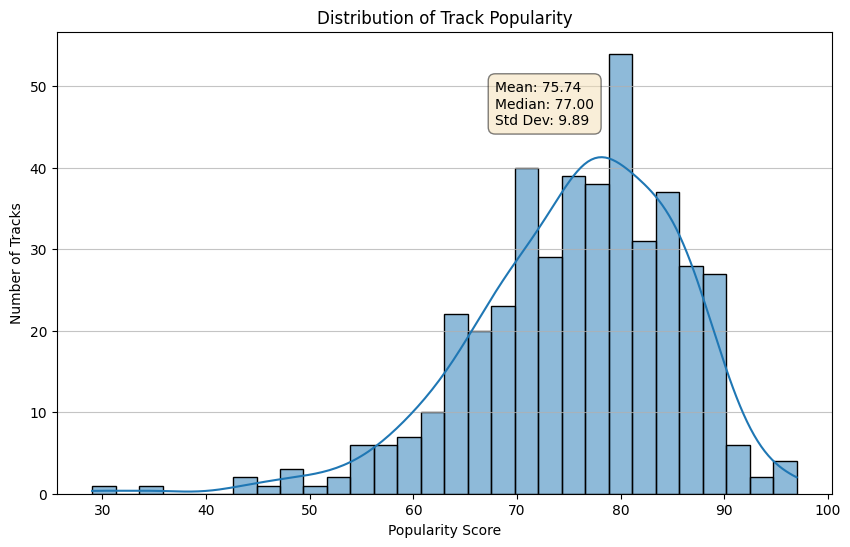


Descriptive statistics for Track Popularity:
count    440.000000
mean      75.736364
std        9.886534
min       29.000000
25%       70.000000
50%       77.000000
75%       83.000000
max       97.000000
Name: Popularity, dtype: float64


In [ ]:
# Ques 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

# Solution 2.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('spotify.csv')
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: 'amazon.csv' not found. Please ensure the file is in the correct directory.")
    exit()

popularity_column_name = 'Popularity'

if popularity_column_name not in df.columns:
    print(f"Error: Column '{popularity_column_name}' not found in the DataFrame.")
    print("Available columns are:", df.columns.tolist())
else:
    track_popularity = df[popularity_column_name]
    track_popularity = pd.to_numeric(track_popularity, errors='coerce')
    track_popularity.dropna(inplace=True)

    if track_popularity.empty:
        print("No valid numeric data found in the popularity column after cleaning.")
    else:
        plt.figure(figsize=(10, 6))
        sns.histplot(track_popularity, kde=True, bins=30)

        plt.title('Distribution of Track Popularity')
        plt.xlabel('Popularity Score')
        plt.ylabel('Number of Tracks')
        plt.grid(axis='y', alpha=0.75)

        plt.text(track_popularity.max() * 0.7, plt.ylim()[1] * 0.8,
                 f'Mean: {track_popularity.mean():.2f}\nMedian: {track_popularity.median():.2f}\nStd Dev: {track_popularity.std():.2f}',
                 bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


        plt.show()

        # --- Optional: Print descriptive statistics ---
        print("\nDescriptive statistics for Track Popularity:")
        print(track_popularity.describe())


DataFrame loaded successfully.


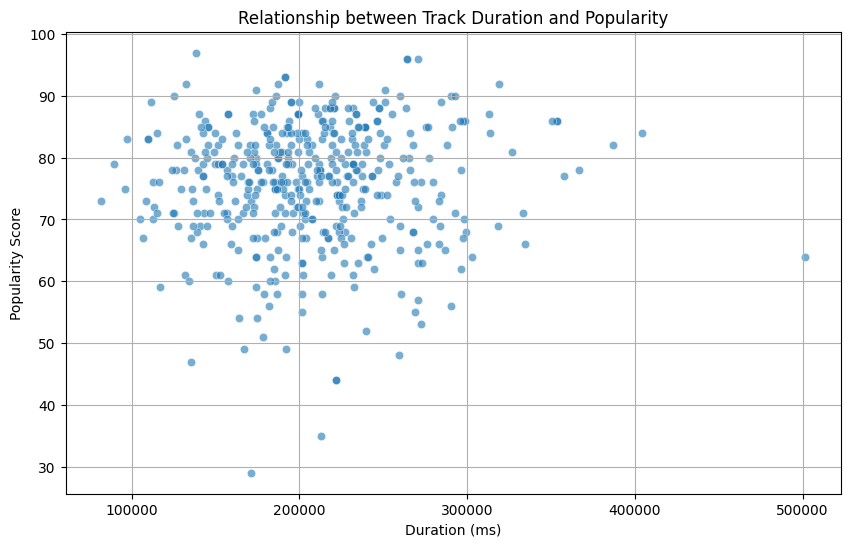


The Pearson correlation coefficient between Duration (ms) and Popularity is: 0.04
Interpretation: There is a very weak or no linear relationship.


In [ ]:
# Ques 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

# Solution 3.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv('spotify.csv')
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please ensure the file is in the correct directory.")
    exit()

popularity_column_name = 'Popularity'
duration_column_name = 'Duration (ms)'

# Check if the required columns exist
required_columns = [popularity_column_name, duration_column_name]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
    print("Available columns are:", df.columns.tolist())
else:
    df[popularity_column_name] = pd.to_numeric(df[popularity_column_name], errors='coerce')
    df[duration_column_name] = pd.to_numeric(df[duration_column_name], errors='coerce')

    df_cleaned = df.dropna(subset=[popularity_column_name, duration_column_name]).copy()

    if df_cleaned.empty:
        print("No valid numeric data found in the popularity or duration columns after cleaning.")
    else:
        if duration_column_name == 'duration_ms':
            df_cleaned['duration_seconds'] = df_cleaned[duration_column_name] / 1000.0
            duration_column_for_plot = 'duration_seconds'
            duration_label = 'Duration (seconds)'
        else:
            duration_column_for_plot = duration_column_name
            duration_label = duration_column_name

        # --- Visualize the relationship using a scatter plot ---

        plt.figure(figsize=(10, 6))

        sns.scatterplot(x=duration_column_for_plot, y=popularity_column_name, data=df_cleaned, alpha=0.6) # alpha controls point transparency


        plt.title('Relationship between Track Duration and Popularity')
        plt.xlabel(duration_label)
        plt.ylabel('Popularity Score')
        plt.grid(True) # Add a grid

        plt.show()


        correlation = df_cleaned[duration_column_for_plot].corr(df_cleaned[popularity_column_name])
        print(f"\nThe Pearson correlation coefficient between {duration_label} and {popularity_column_name} is: {correlation:.2f}")

        # Interpret the correlation:
        if np.abs(correlation) > 0.7:
            print("Interpretation: There is a strong linear relationship.")
        elif np.abs(correlation) > 0.3:
             print("Interpretation: There is a moderate linear relationship.")
        elif np.abs(correlation) > 0.1:
             print("Interpretation: There is a weak linear relationship.")
        else:
            print("Interpretation: There is a very weak or no linear relationship.")

The artist with the highest number of tracks is: Drake
Number of tracks: 20


<ipython-input-29-2f1585bb8ec0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().index, palette='viridis')


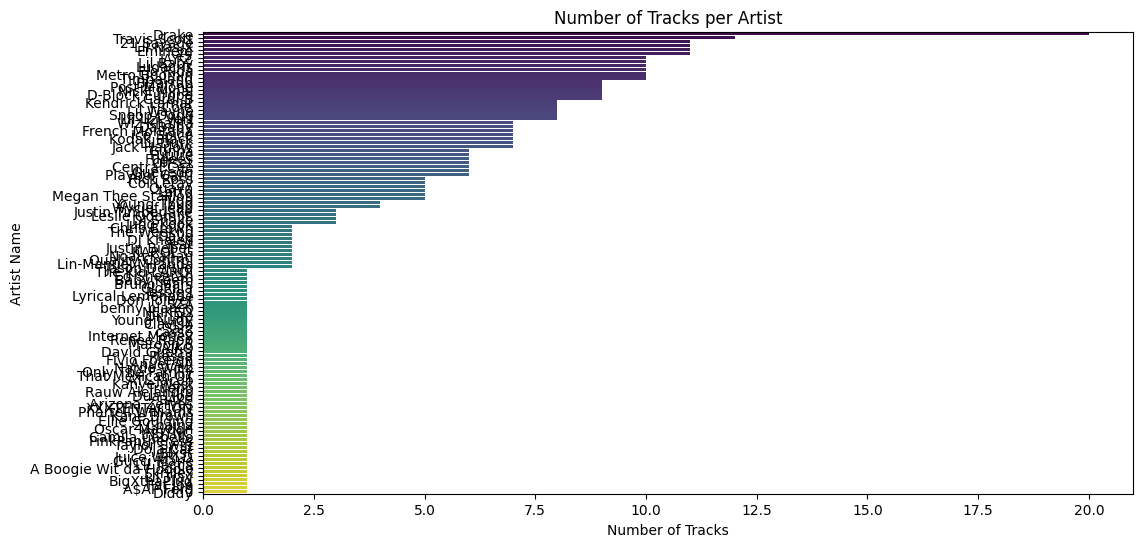

In [ ]:
# Ques 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot.

# Solution 4.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

artist_track_counts = df['Artist'].value_counts()

most_prolific_artist = artist_track_counts.index[0]
highest_track_count = artist_track_counts.iloc[0]

print(f"The artist with the highest number of tracks is: {most_prolific_artist}")
print(f"Number of tracks: {highest_track_count}")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().index, palette='viridis')
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()

In [ ]:
# Ques 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

# Solution 5.

import pandas as pd

try:
    df = pd.read_csv('spotify.csv')
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please ensure the file is in the correct directory.")
    exit()

popularity_column_name = 'Popularity'
track_name_column = 'Track Name'
artist_column_name = 'Artist'


required_columns = [popularity_column_name, track_name_column, artist_column_name]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
    print("Available columns are:", df.columns.tolist())
else:
  df_cleaned = df.dropna(subset=required_columns).copy()
  df_cleaned[popularity_column_name] = pd.to_numeric(df_cleaned[popularity_column_name], errors='coerce')
  df_cleaned.dropna(subset=[popularity_column_name], inplace=True)


if df_cleaned.empty:
  print("No valid data found in the required columns after cleaning.")
else:
  least_popular_tracks = df_cleaned.sort_values(by=popularity_column_name, ascending=True)
  top_5_least_popular = least_popular_tracks.head(5)
  print("Top 5 Least Popular Tracks:")
  print(top_5_least_popular[[artist_column_name, track_name_column, popularity_column_name]])


DataFrame loaded successfully.
Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [ ]:
# Ques 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist.

# Solution 6.

import pandas as pd

try:
    df = pd.read_csv('spotify.csv')
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please ensure the file is in the correct directory.")

artist_column = 'Artist'
popularity_column = 'Popularity'

if artist_column not in df.columns or popularity_column not in df.columns:
    print(f"Error: Make sure your DataFrame has '{artist_column}' and '{popularity_column}' columns.")
else:
    average_popularity_by_artist = df.groupby(artist_column)[popularity_column].mean()
    top_5_artists = average_popularity_by_artist.nlargest(5)

    print("Average Popularity for Top 5 Most Popular Artists:")
    print(top_5_artists)

    # Identify the artist with the highest average popularity among the top 5
    artist_highest_average_popularity = top_5_artists.idxmax()
    highest_average_popularity_value = top_5_artists.max()

    print(f"\nAmong the top 5, the artist with the highest average popularity is: {artist_highest_average_popularity}")
    print(f"Their average popularity is: {highest_average_popularity_value:.2f}")


Average Popularity for Top 5 Most Popular Artists:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

Among the top 5, the artist with the highest average popularity is: cassö
Their average popularity is: 92.00


In [ ]:
# Ques 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

# Solution 7.

import pandas as pd

df = pd.read_csv('spotify.csv')

artist_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
top_artists = artist_popularity.head(5).index.tolist()

print("Top 5 Most Popular Artists:")
print(top_artists)

most_popular_tracks = {}
for artist in top_artists:
    artist_df = df[df['Artist'] == artist]
    most_popular_track = artist_df.loc[artist_df['Popularity'].idxmax()]
    most_popular_tracks[artist] = most_popular_track['Track Name']

# 3. List the track name for each artist
print("\nMost Popular Track for Each Top Artist:")
for artist, track in most_popular_tracks.items():
    print(f"{artist}: {track}")

Top 5 Most Popular Artists:
['cassö', 'Trueno', 'David Guetta', 'Travis Scott', '¥$']

Most Popular Track for Each Top Artist:
cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


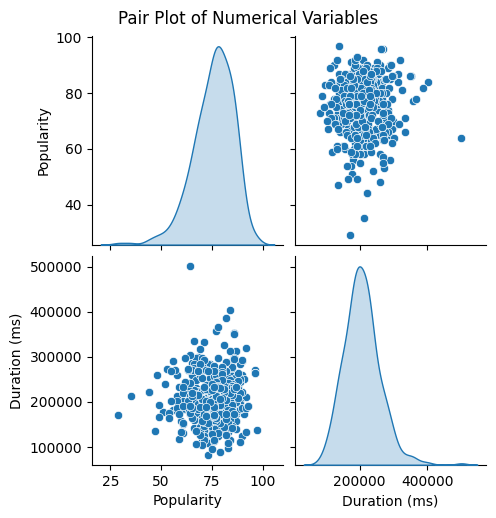

In [ ]:
# Ques 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

# Solution 8.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('spotify.csv')
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please ensure the file is in the correct directory.")

numerical_cols = ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']

if not all(col in df.columns for col in numerical_cols):
    missing_cols = [col for col in numerical_cols if col not in df.columns]
    print(f"Error: Missing one or more specified numerical columns: {missing_cols}.")
else:
    sns.pairplot(df[numerical_cols], kind='scatter', diag_kind='kde')

    plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
    plt.show()

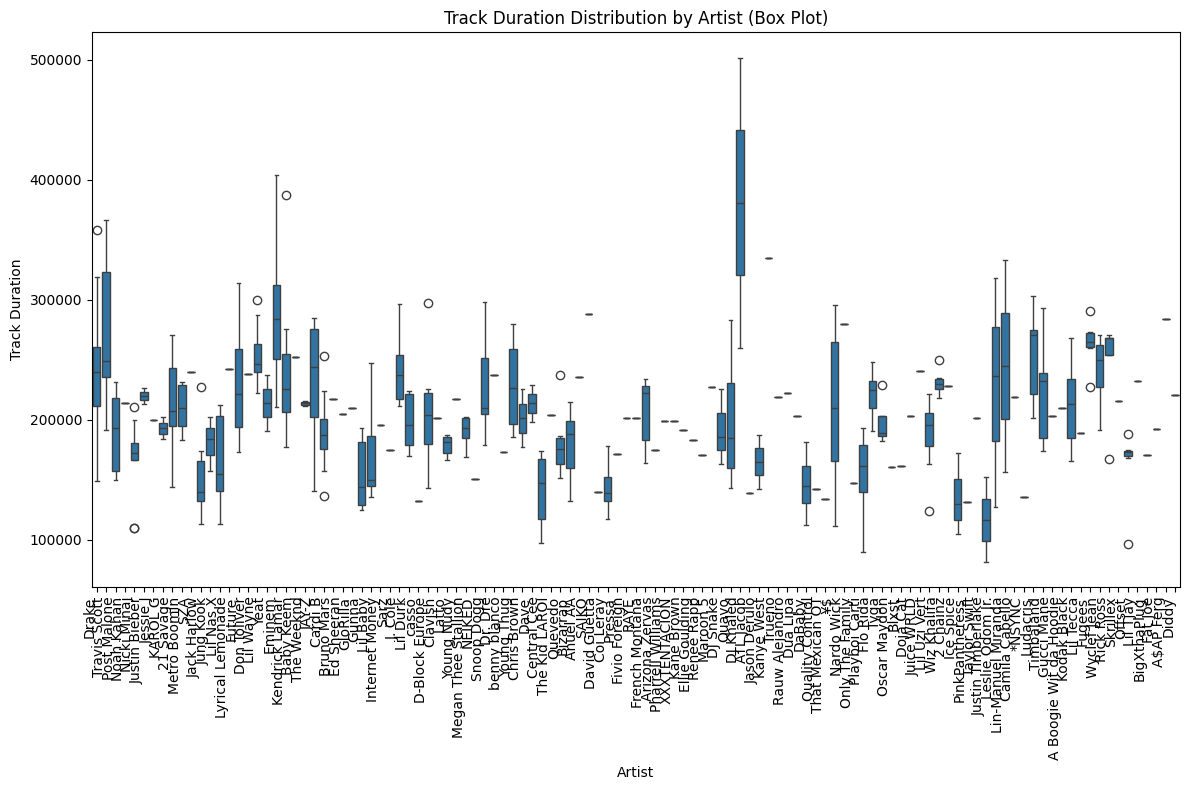

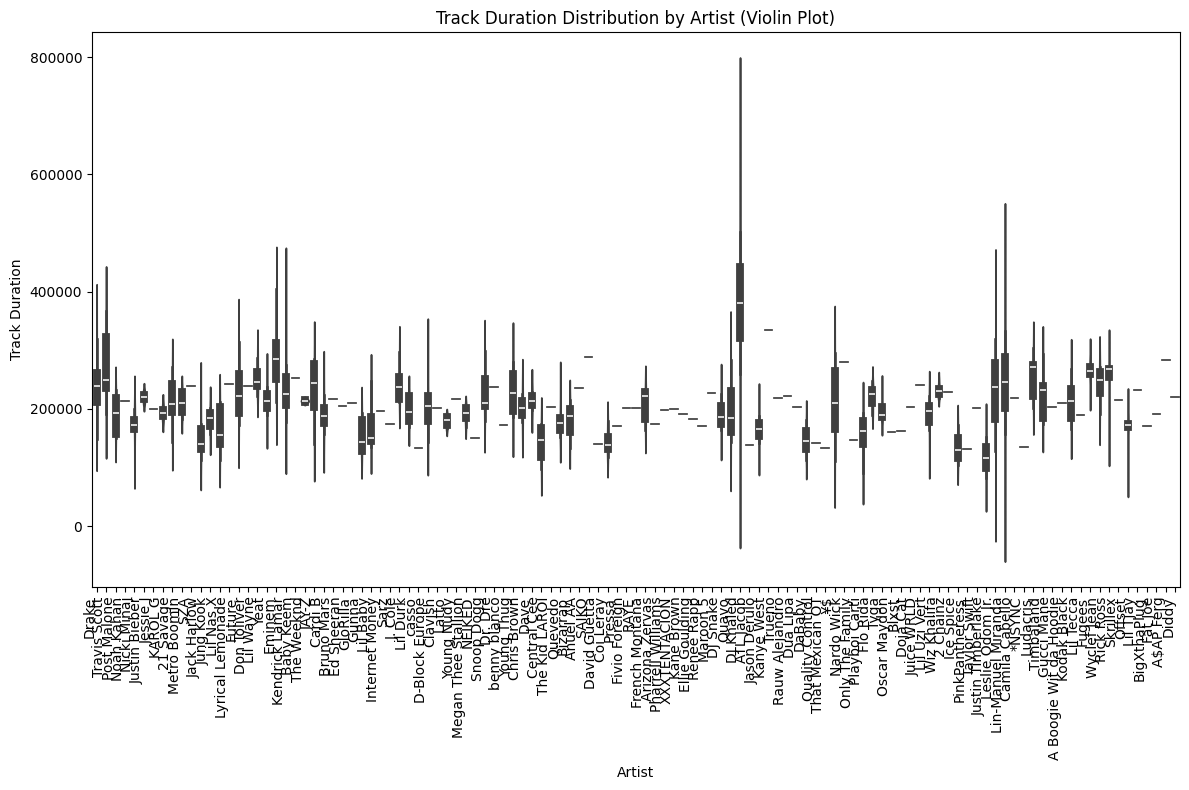

In [ ]:
# Ques 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot

# Solution 9.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('spotify.csv')
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please ensure the file is in the correct directory.")

artist_column = 'Artist'
duration_column = 'Duration (ms)'

required_columns = [artist_column, duration_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df[duration_column] = pd.to_numeric(df[duration_column], errors='coerce')
    df_cleaned = df.dropna(subset=[artist_column, duration_column]).copy()

    # Create a box plot to visualize the distribution of track durations by artist
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=artist_column, y=duration_column, data=df_cleaned)
    plt.title('Track Duration Distribution by Artist (Box Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Track Duration')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

    # Alternatively, create a violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=artist_column, y=duration_column, data=df_cleaned)
    plt.title('Track Duration Distribution by Artist (Violin Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Track Duration')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be plac

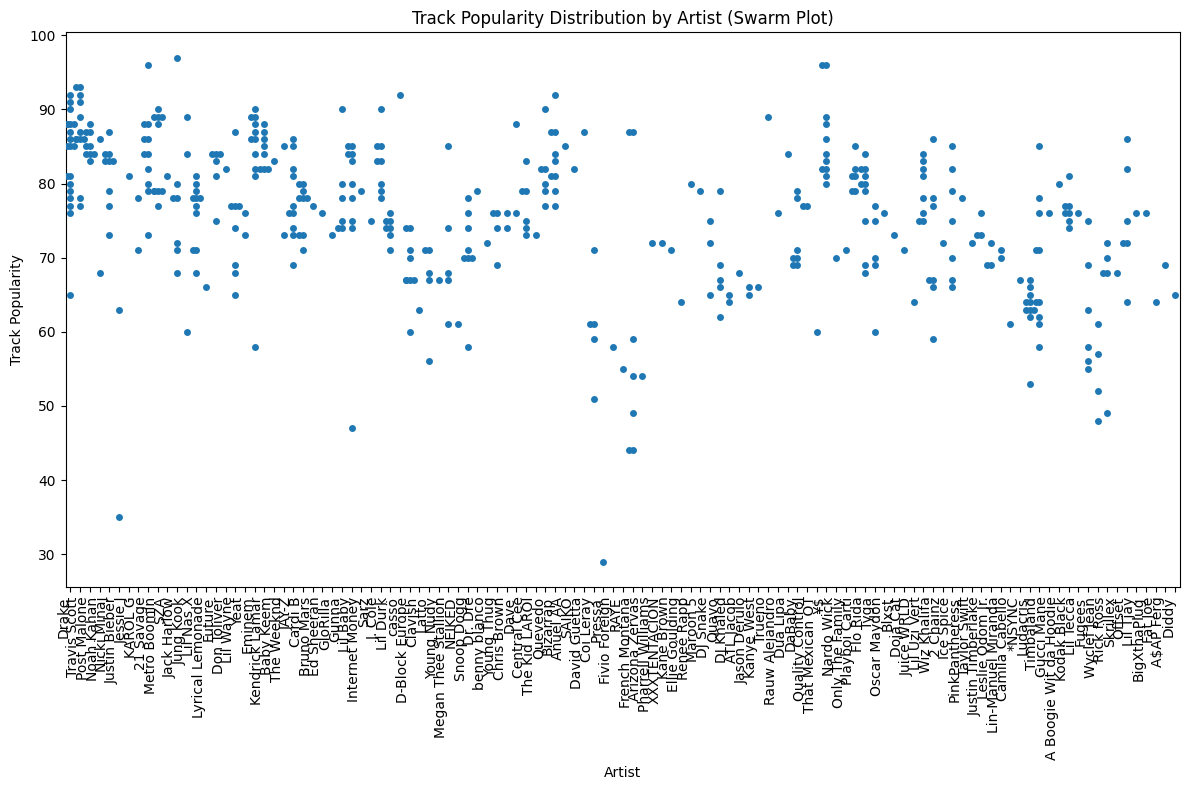

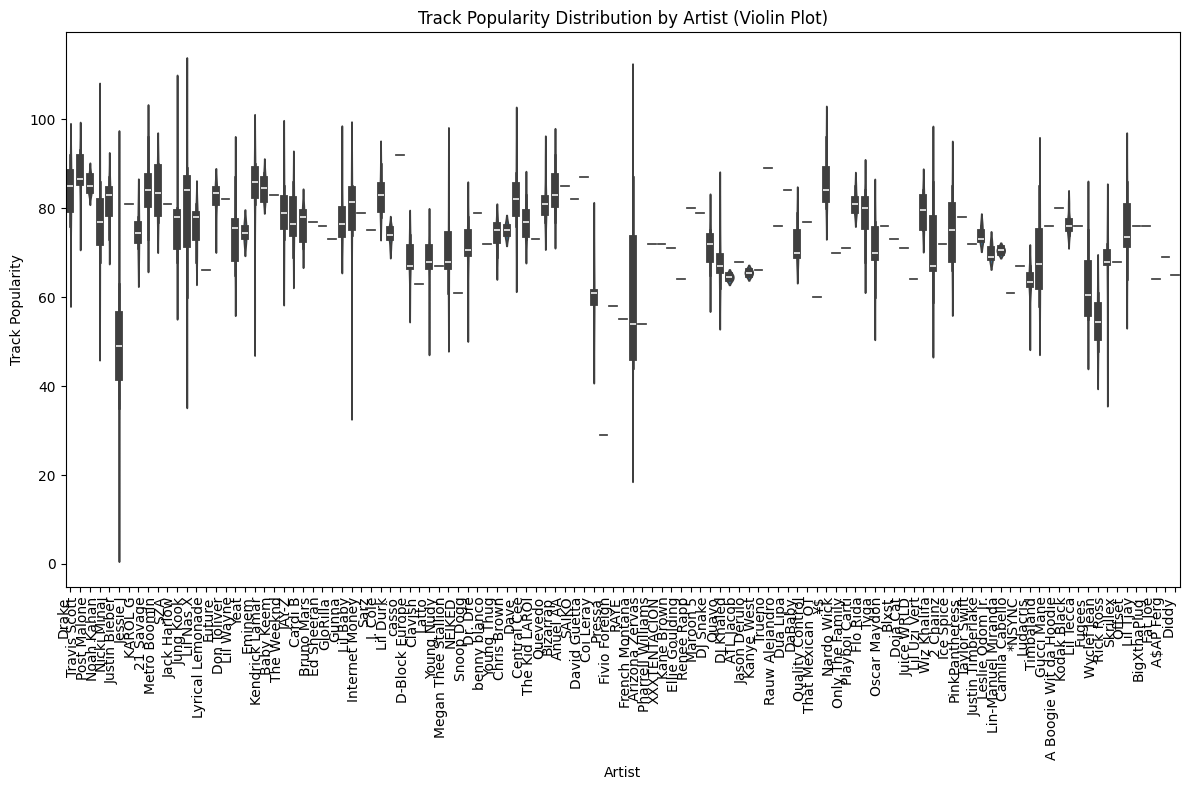

In [ ]:
# Ques 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot.

# Solution 10.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('spotify.csv')
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please ensure the file is in the correct directory.")

artist_column = 'Artist'
track_popularity_column = 'Popularity'

required_columns = [artist_column, track_popularity_column]
if not all(col in df.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing one or more required columns: {missing_cols}. Please check your CSV file.")
else:
    df[track_popularity_column] = pd.to_numeric(df[track_popularity_column], errors='coerce')
    df_cleaned = df.dropna(subset=[artist_column, track_popularity_column]).copy()

    # Swarm Plot

    plt.figure(figsize=(12, 8))
    sns.swarmplot(x=artist_column, y=track_popularity_column, data=df_cleaned)
    plt.title('Track Popularity Distribution by Artist (Swarm Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Track Popularity')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

    # Violin Plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=artist_column, y=track_popularity_column, data=df_cleaned)
    plt.title('Track Popularity Distribution by Artist (Violin Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Track Popularity')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()